Plate Detection Code
-----------------------------

This script is designed to detect license plates in images using YOLOv8 and extract the text from the detected license plates.

1. It loads YOLOv8 model with pre-trained weights for object detection.
2. Loads a dataset from Roboflow for testing.
3. For each image in the dataset, it performs car and license plate detection.
4. It then extracts text from the detected license plates using Optical Character Recognition (OCR).
5. The results are saved or processed further as needed.

### Install Libraries in Colab

In [1]:
!pip install supervision==0.1.0
!pip install ultralytics
!pip install roboflow
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.0 MB/s eta 0:00:00


### Import Libraries

In [15]:
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import display, Image
import glob

### Load Models

In [10]:
model = YOLO('yolov8x.pt')
model.fuse()

YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


### Testing

In [3]:
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25, save=True)

100%|██████████| 131M/131M [00:00<00:00, 251MB/s]

100%|██████████| 104k/104k [00:00<00:00, 53.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 253.6ms
Speed: 2.2ms preprocess, 253.6ms inference, 53.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


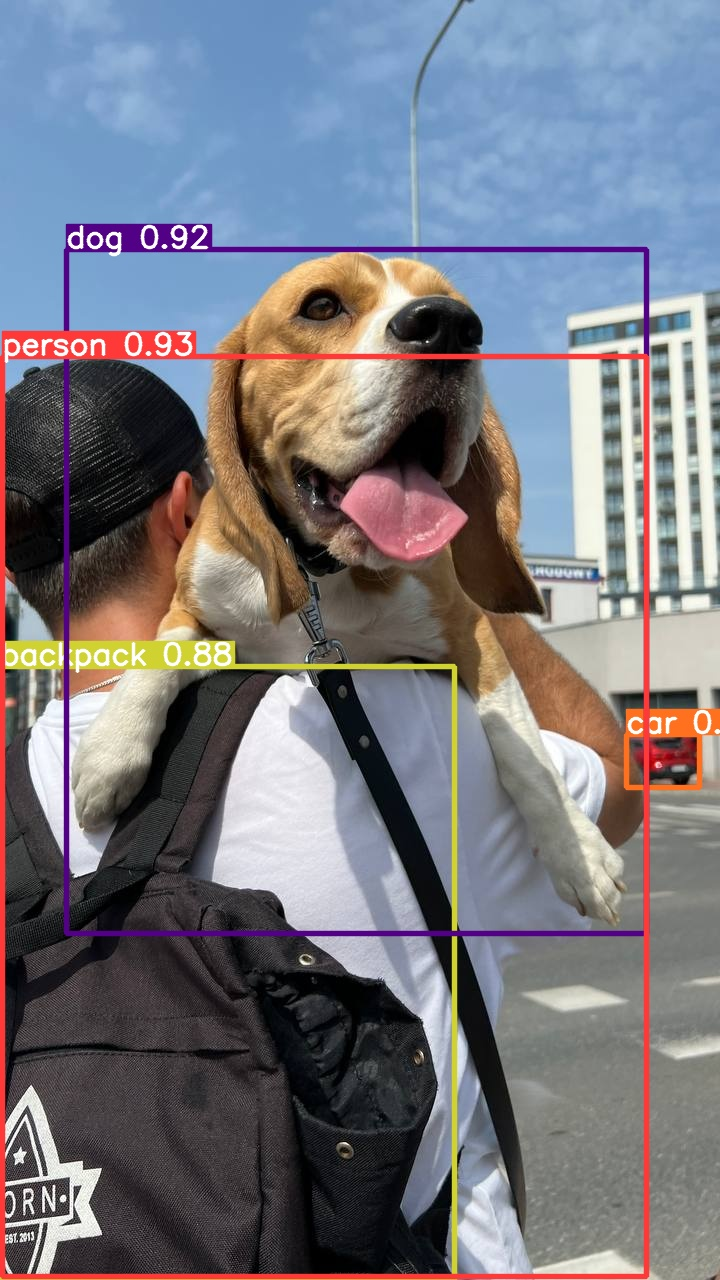

In [9]:
Image(filename=r'/content/runs/detect/predict/dog.jpeg', width=600)

### Load Data from Roboflow

In [4]:
rf = Roboflow(api_key="inter_your_API")
project = rf.workspace("moin").project("car_license_plates")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Car_License_Plates-1 in yolov8:: 100%|██████████| 1402/1402 [00:00<00:00, 5049.09it/s]


### Training

In [13]:
model.train(data="/content/Car_License_Plates-1/data.yaml", epochs=80, imgsz=640)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Car_License_Plates-1/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b759e4d3f70>
fitness: 0.5835075727543216
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.54929])
names: {0: 'licence'}
plot: True
results_dict: {'metrics/precision(B)': 0.9640789109754627, 'metrics/recall(B)': 0.7894341603266553, 'metrics/mAP50(B)': 0.8914665538788754, 'metrics/mAP50-95(B)': 0.5492899081849267, 'fitness': 0.5835075727543216}
save_dir: PosixPath('runs/detect/train3')
speed: {'preprocess': 1.865144819021225, 'inference': 27.87988632917404, 'loss': 0.0010319054126739502, 'postprocess': 1.6832128167152405}

### Test Model in Data Batch

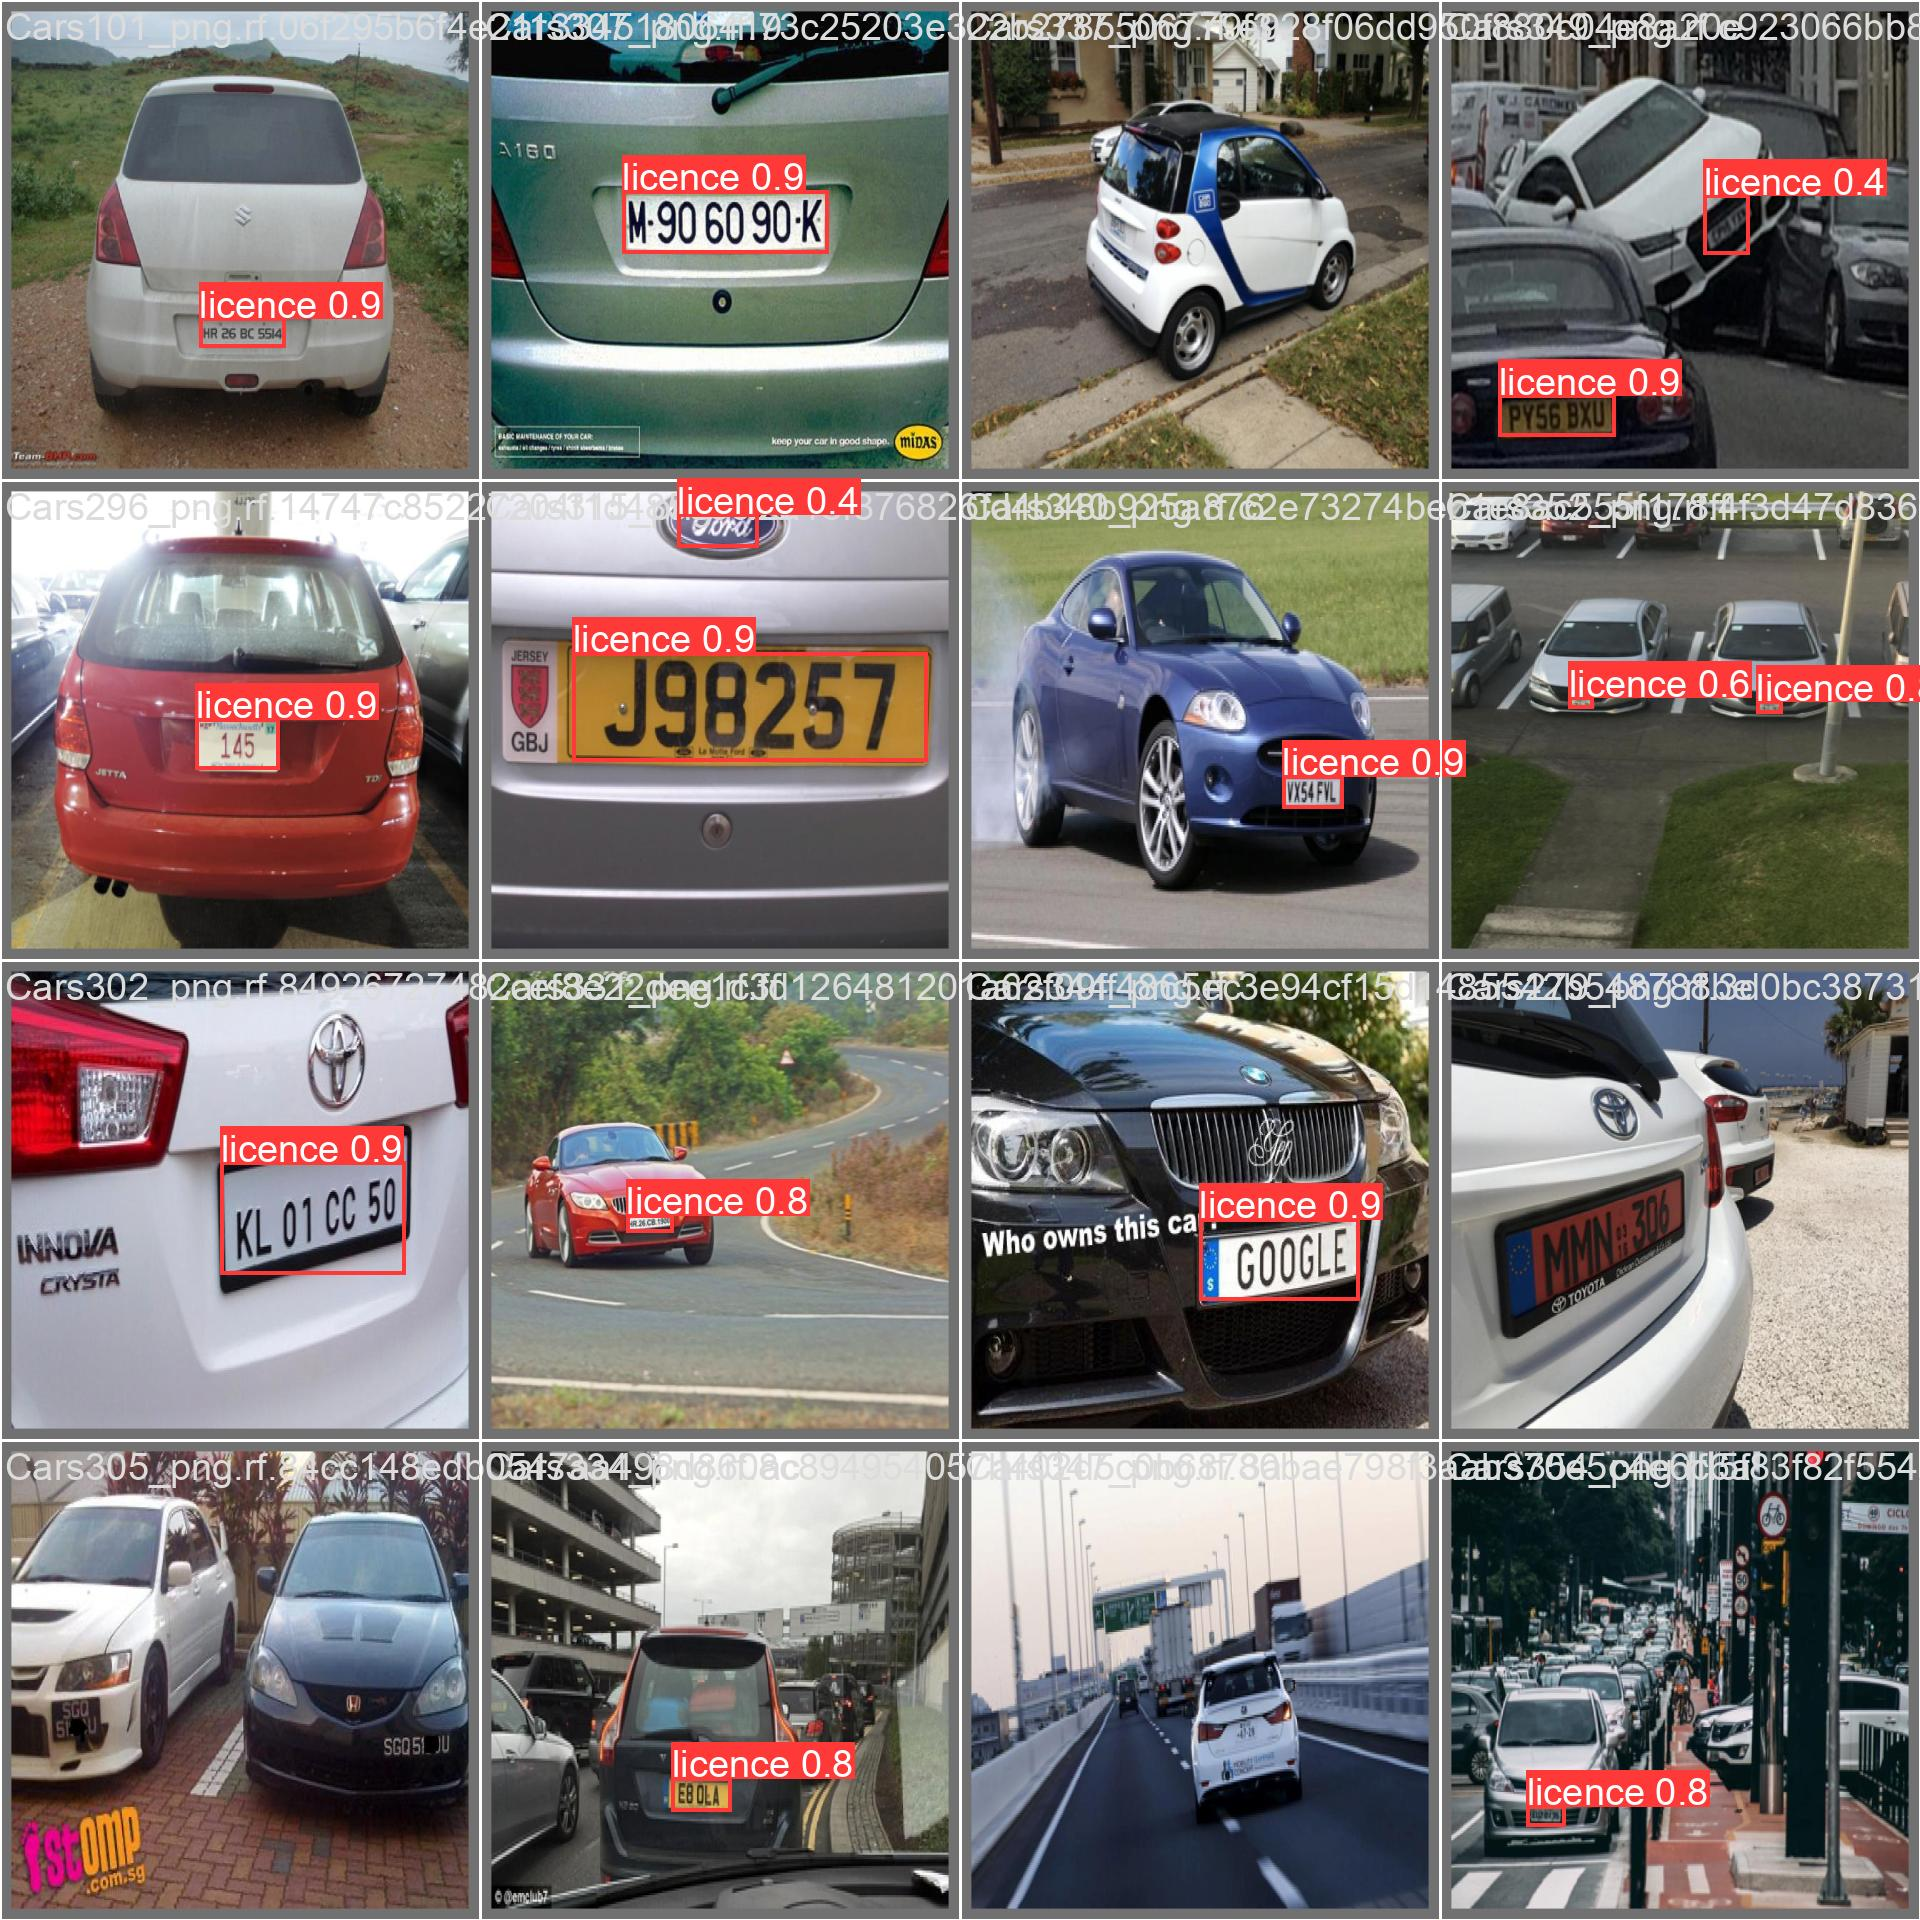

---------------------------------------------------------------------------------------------------- 



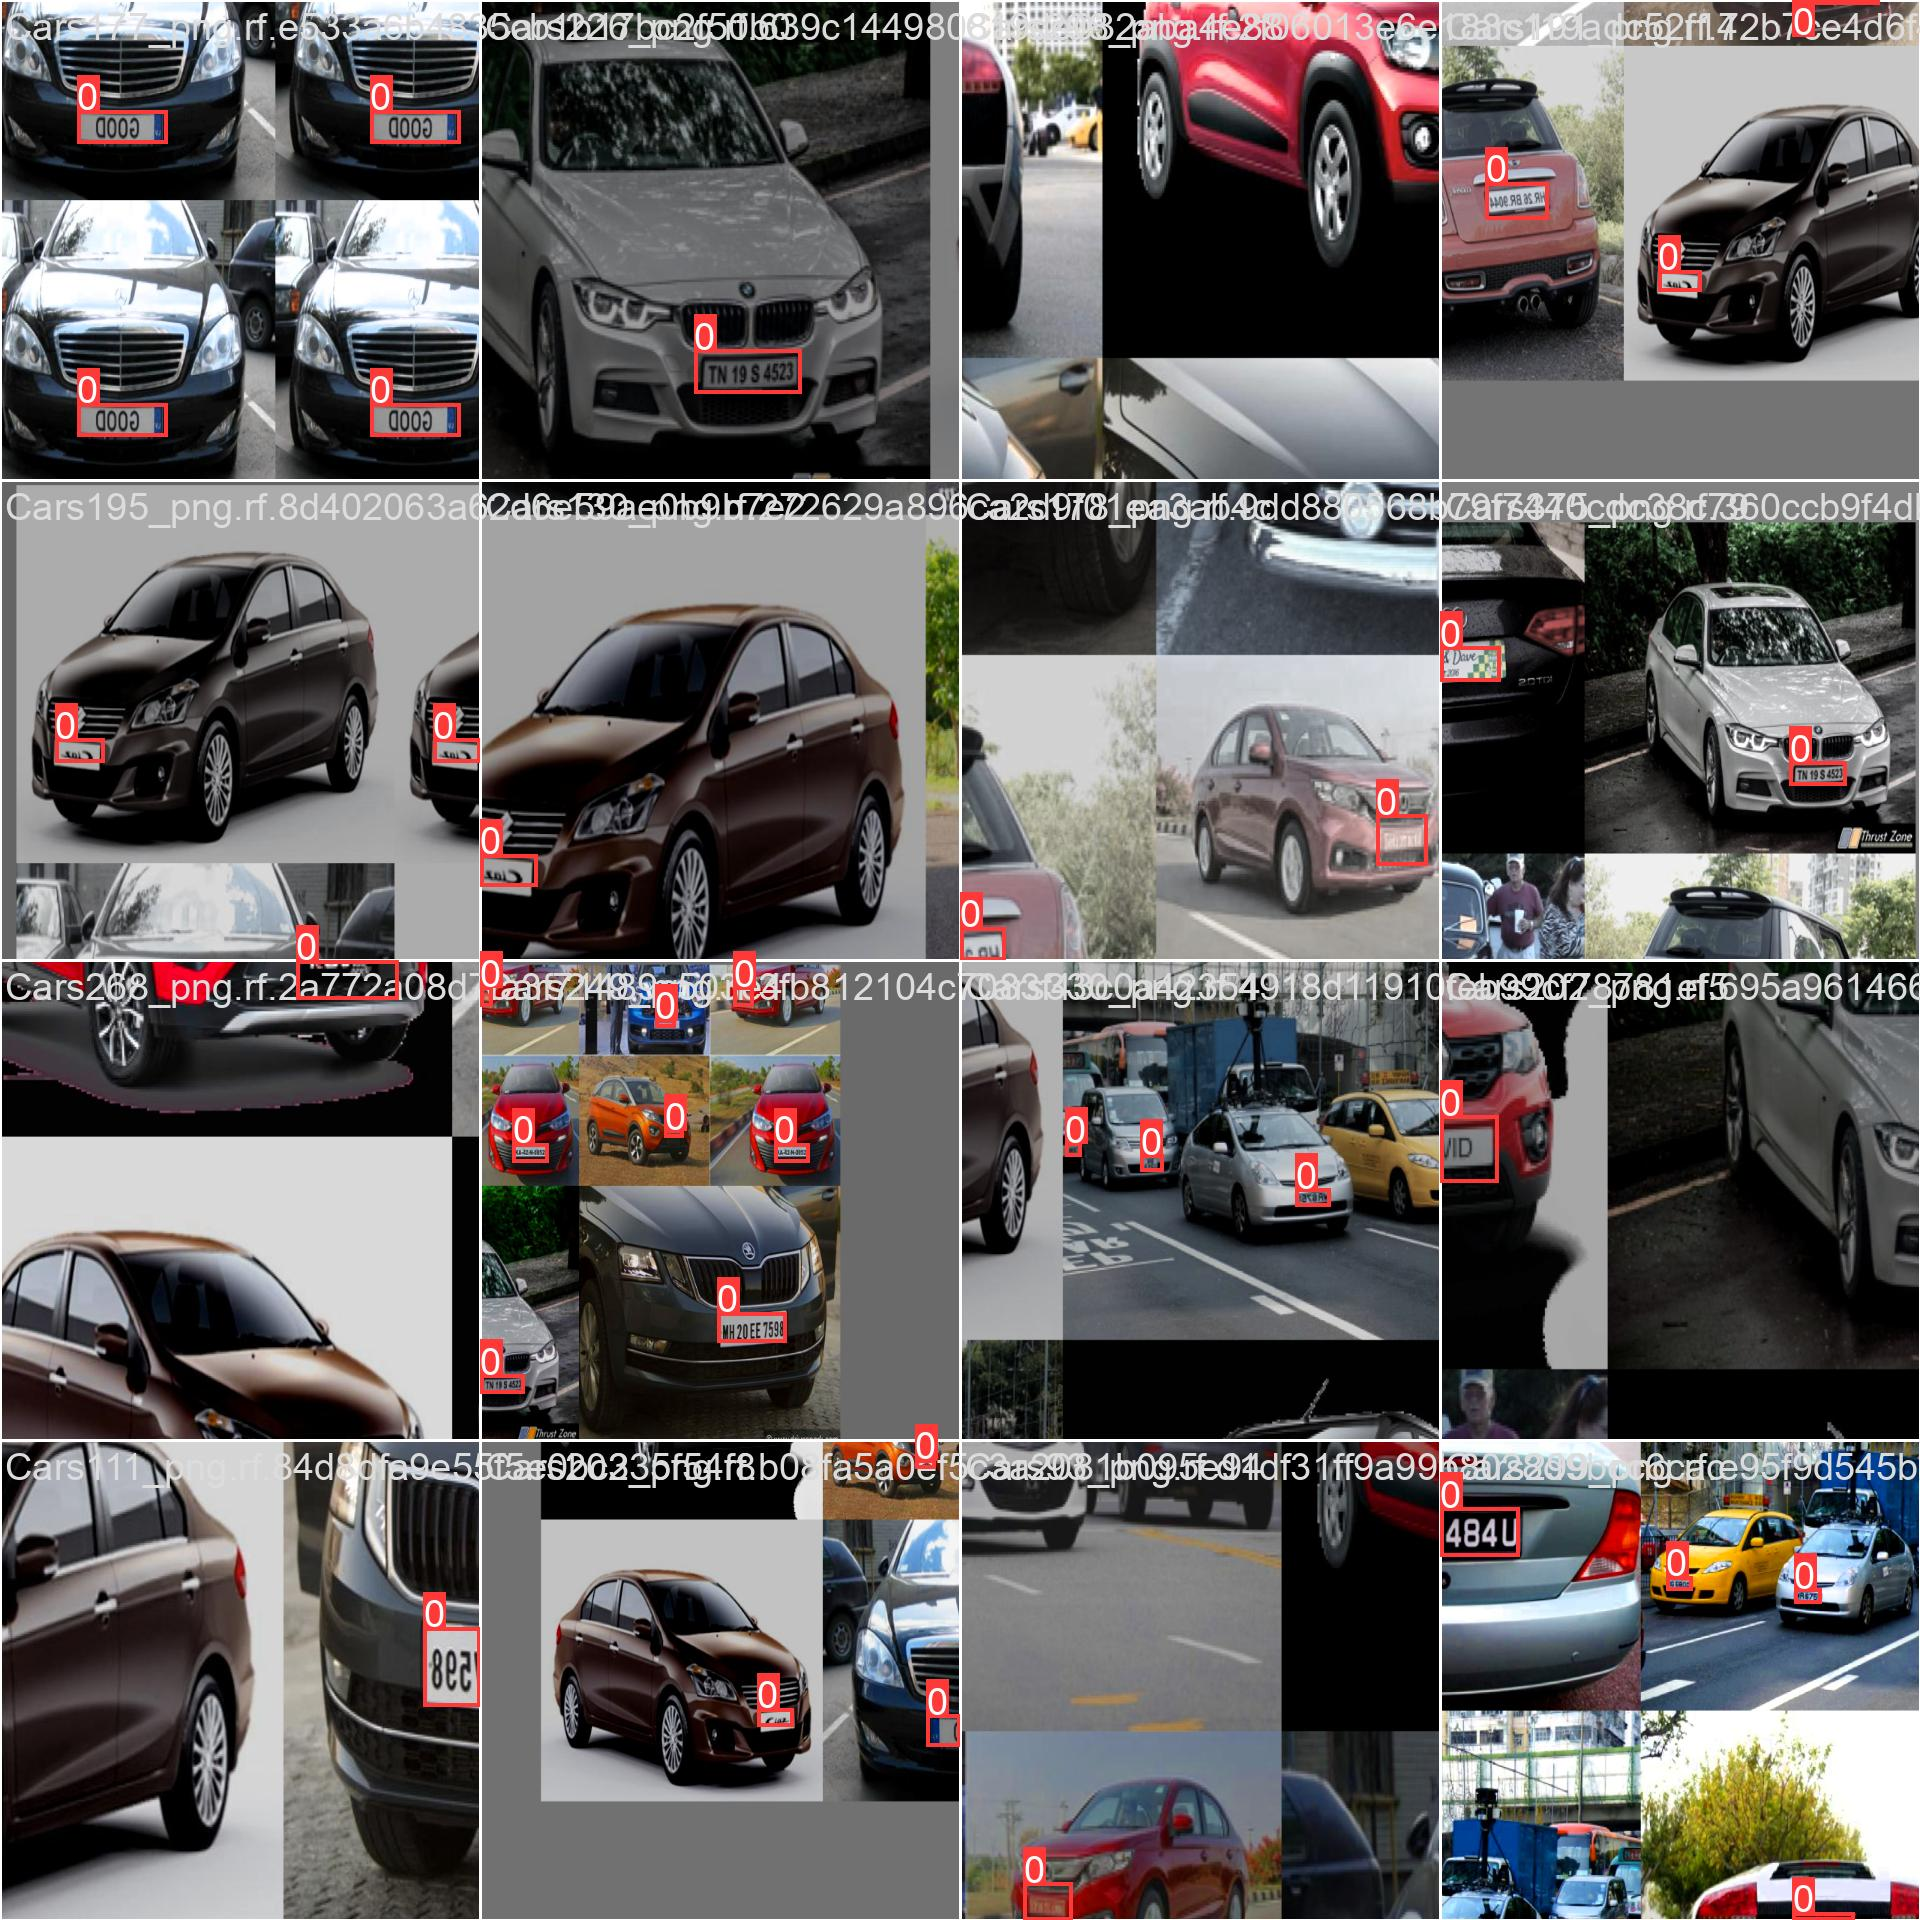

---------------------------------------------------------------------------------------------------- 



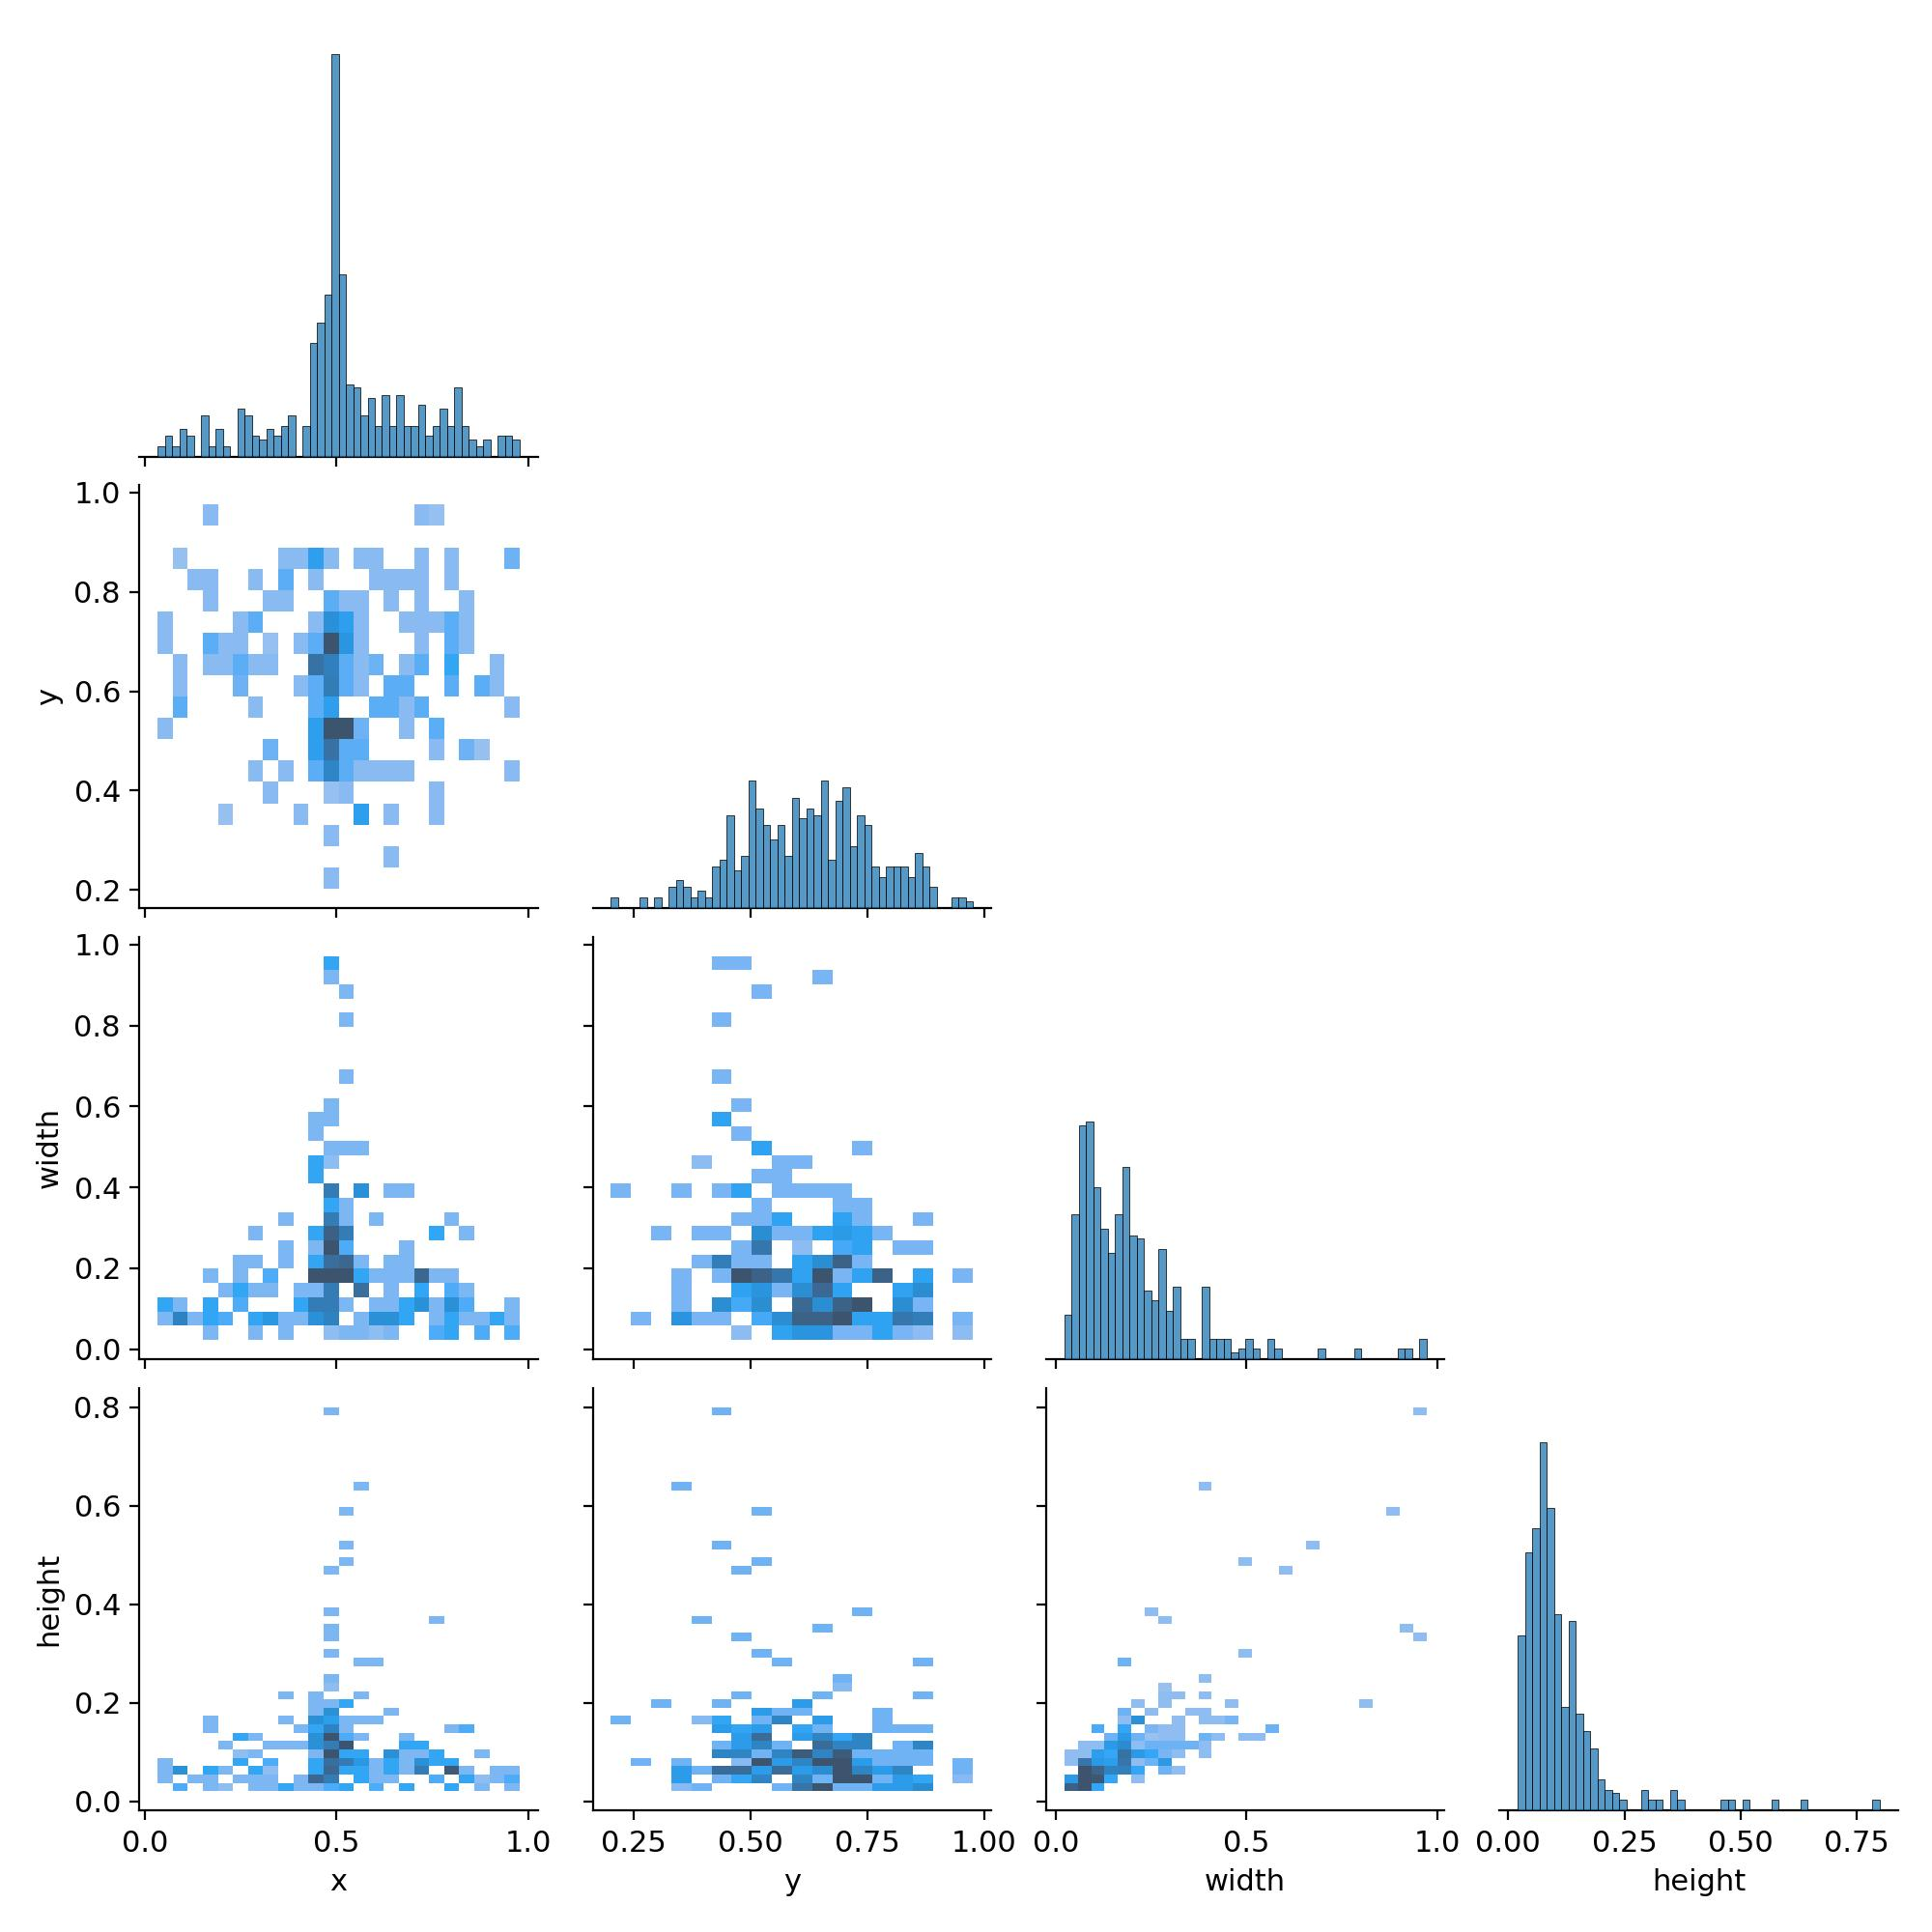

---------------------------------------------------------------------------------------------------- 



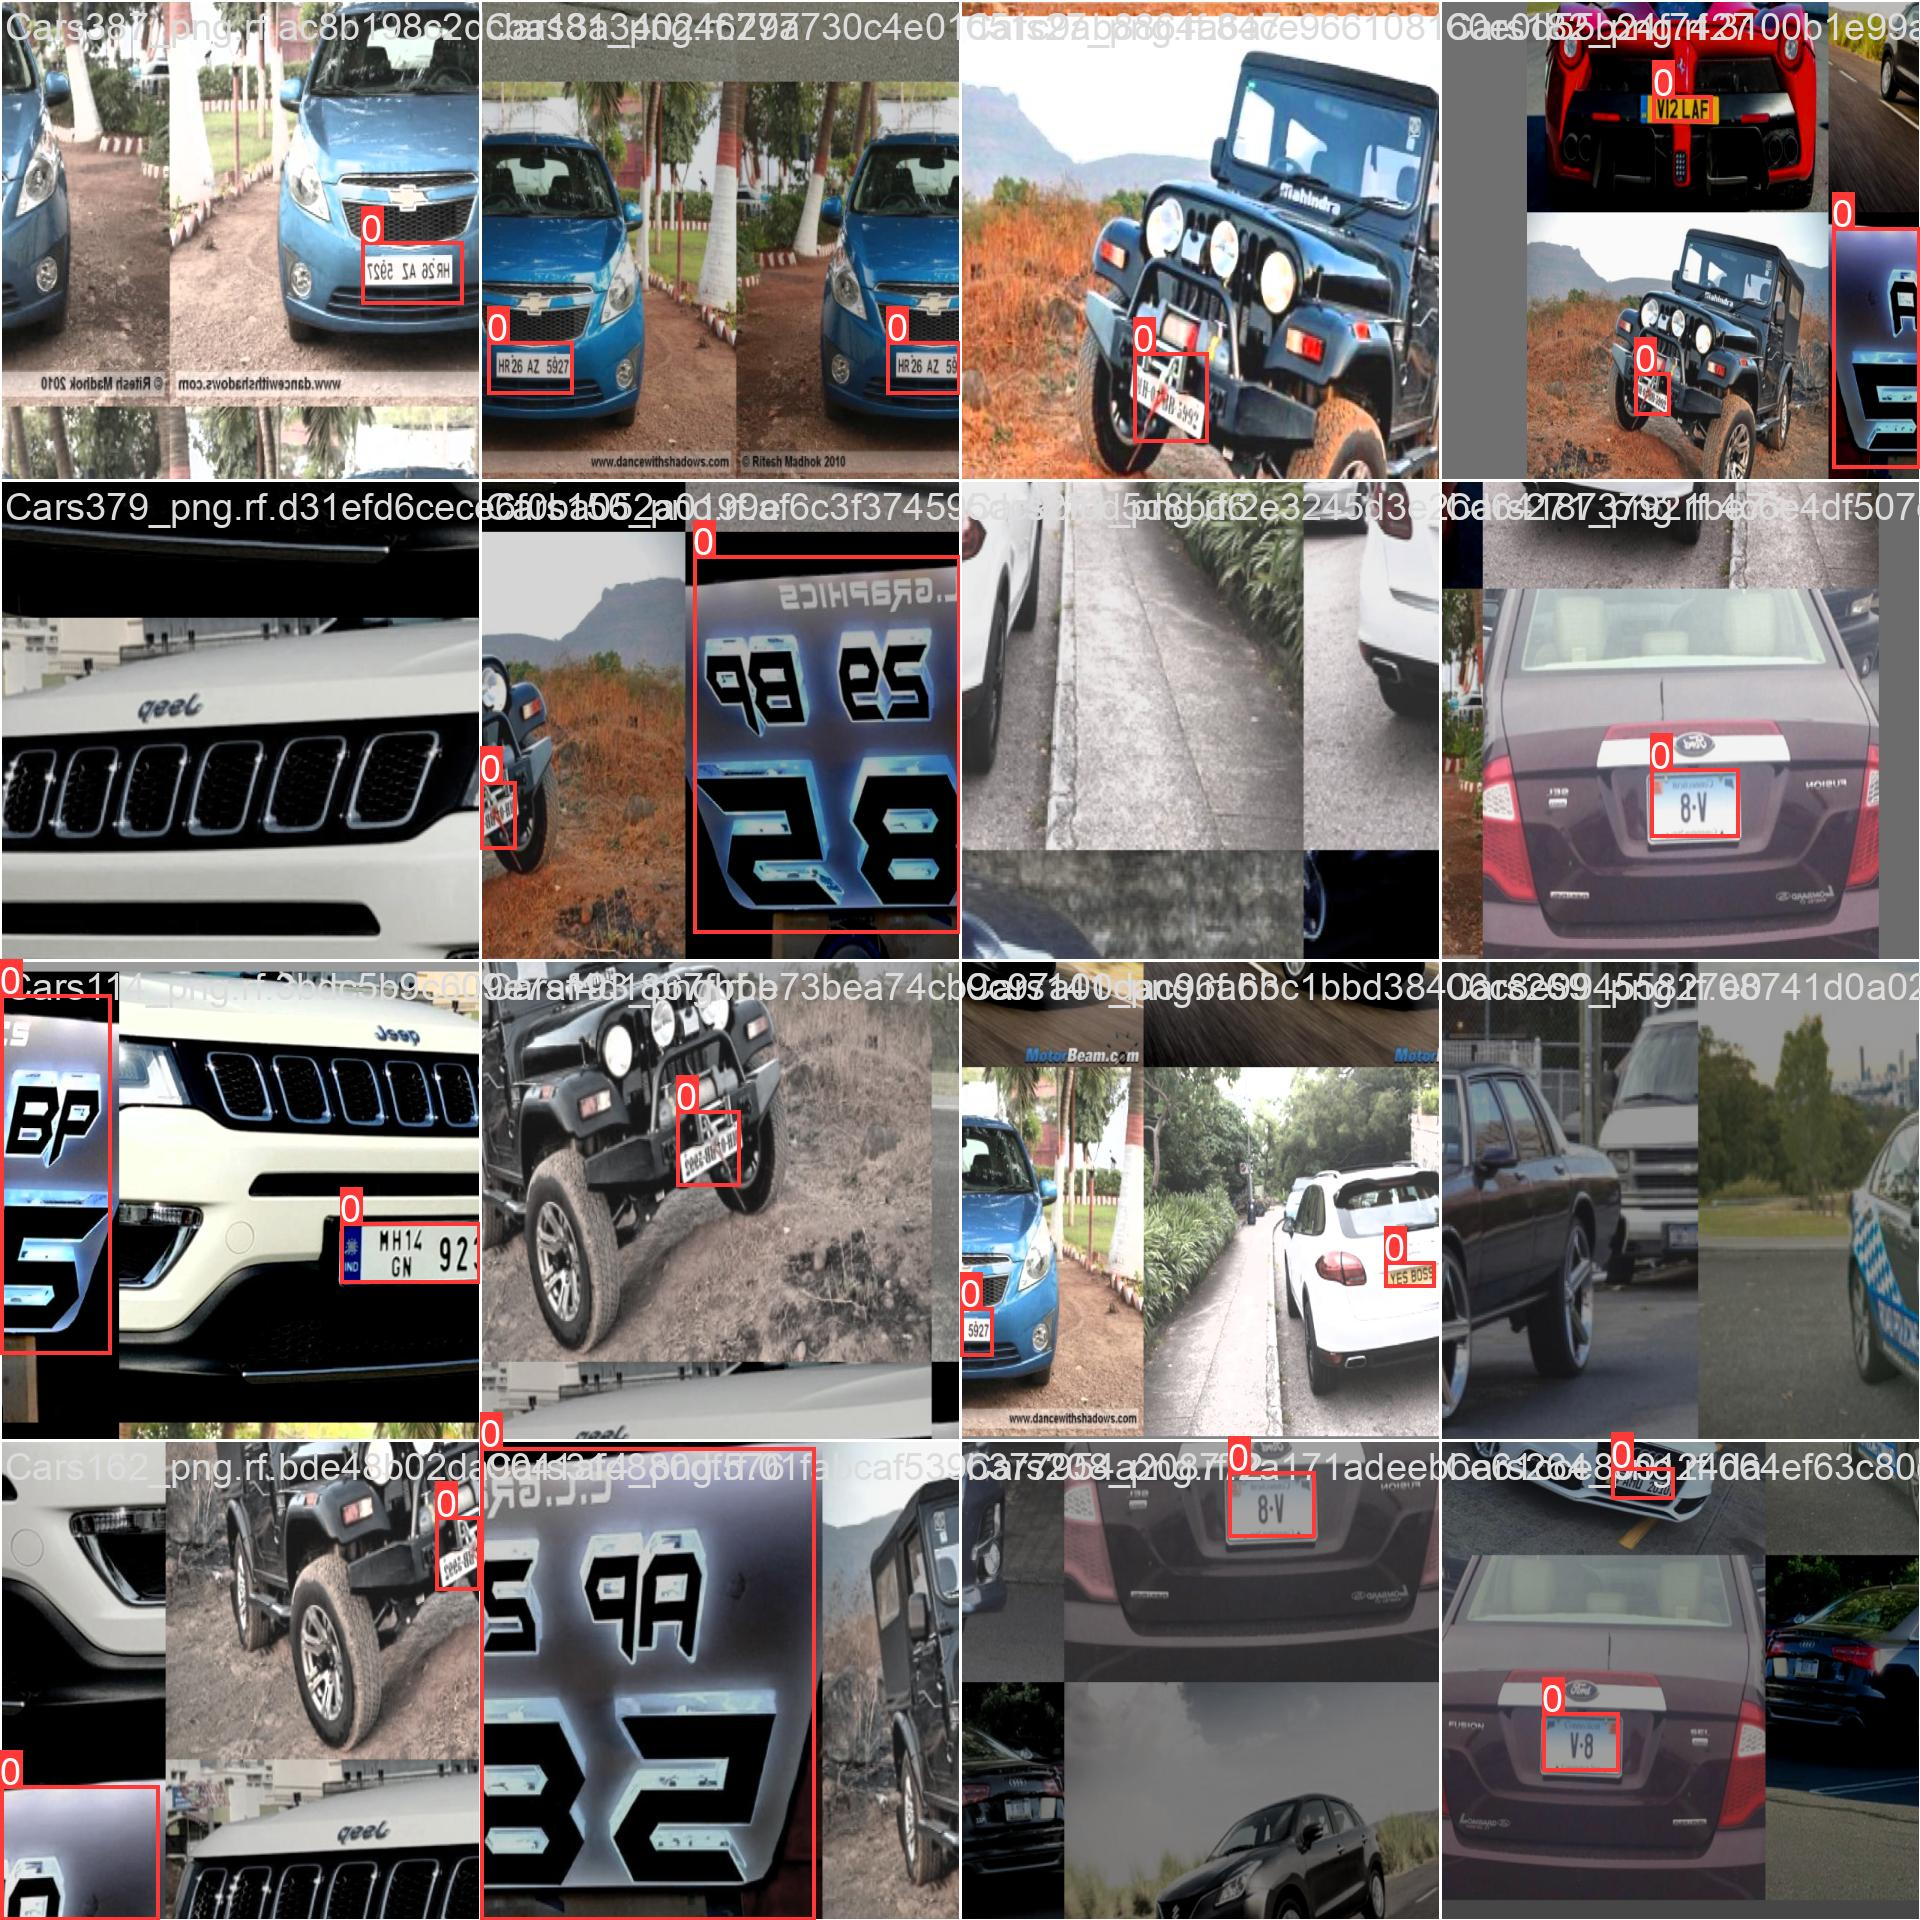

---------------------------------------------------------------------------------------------------- 



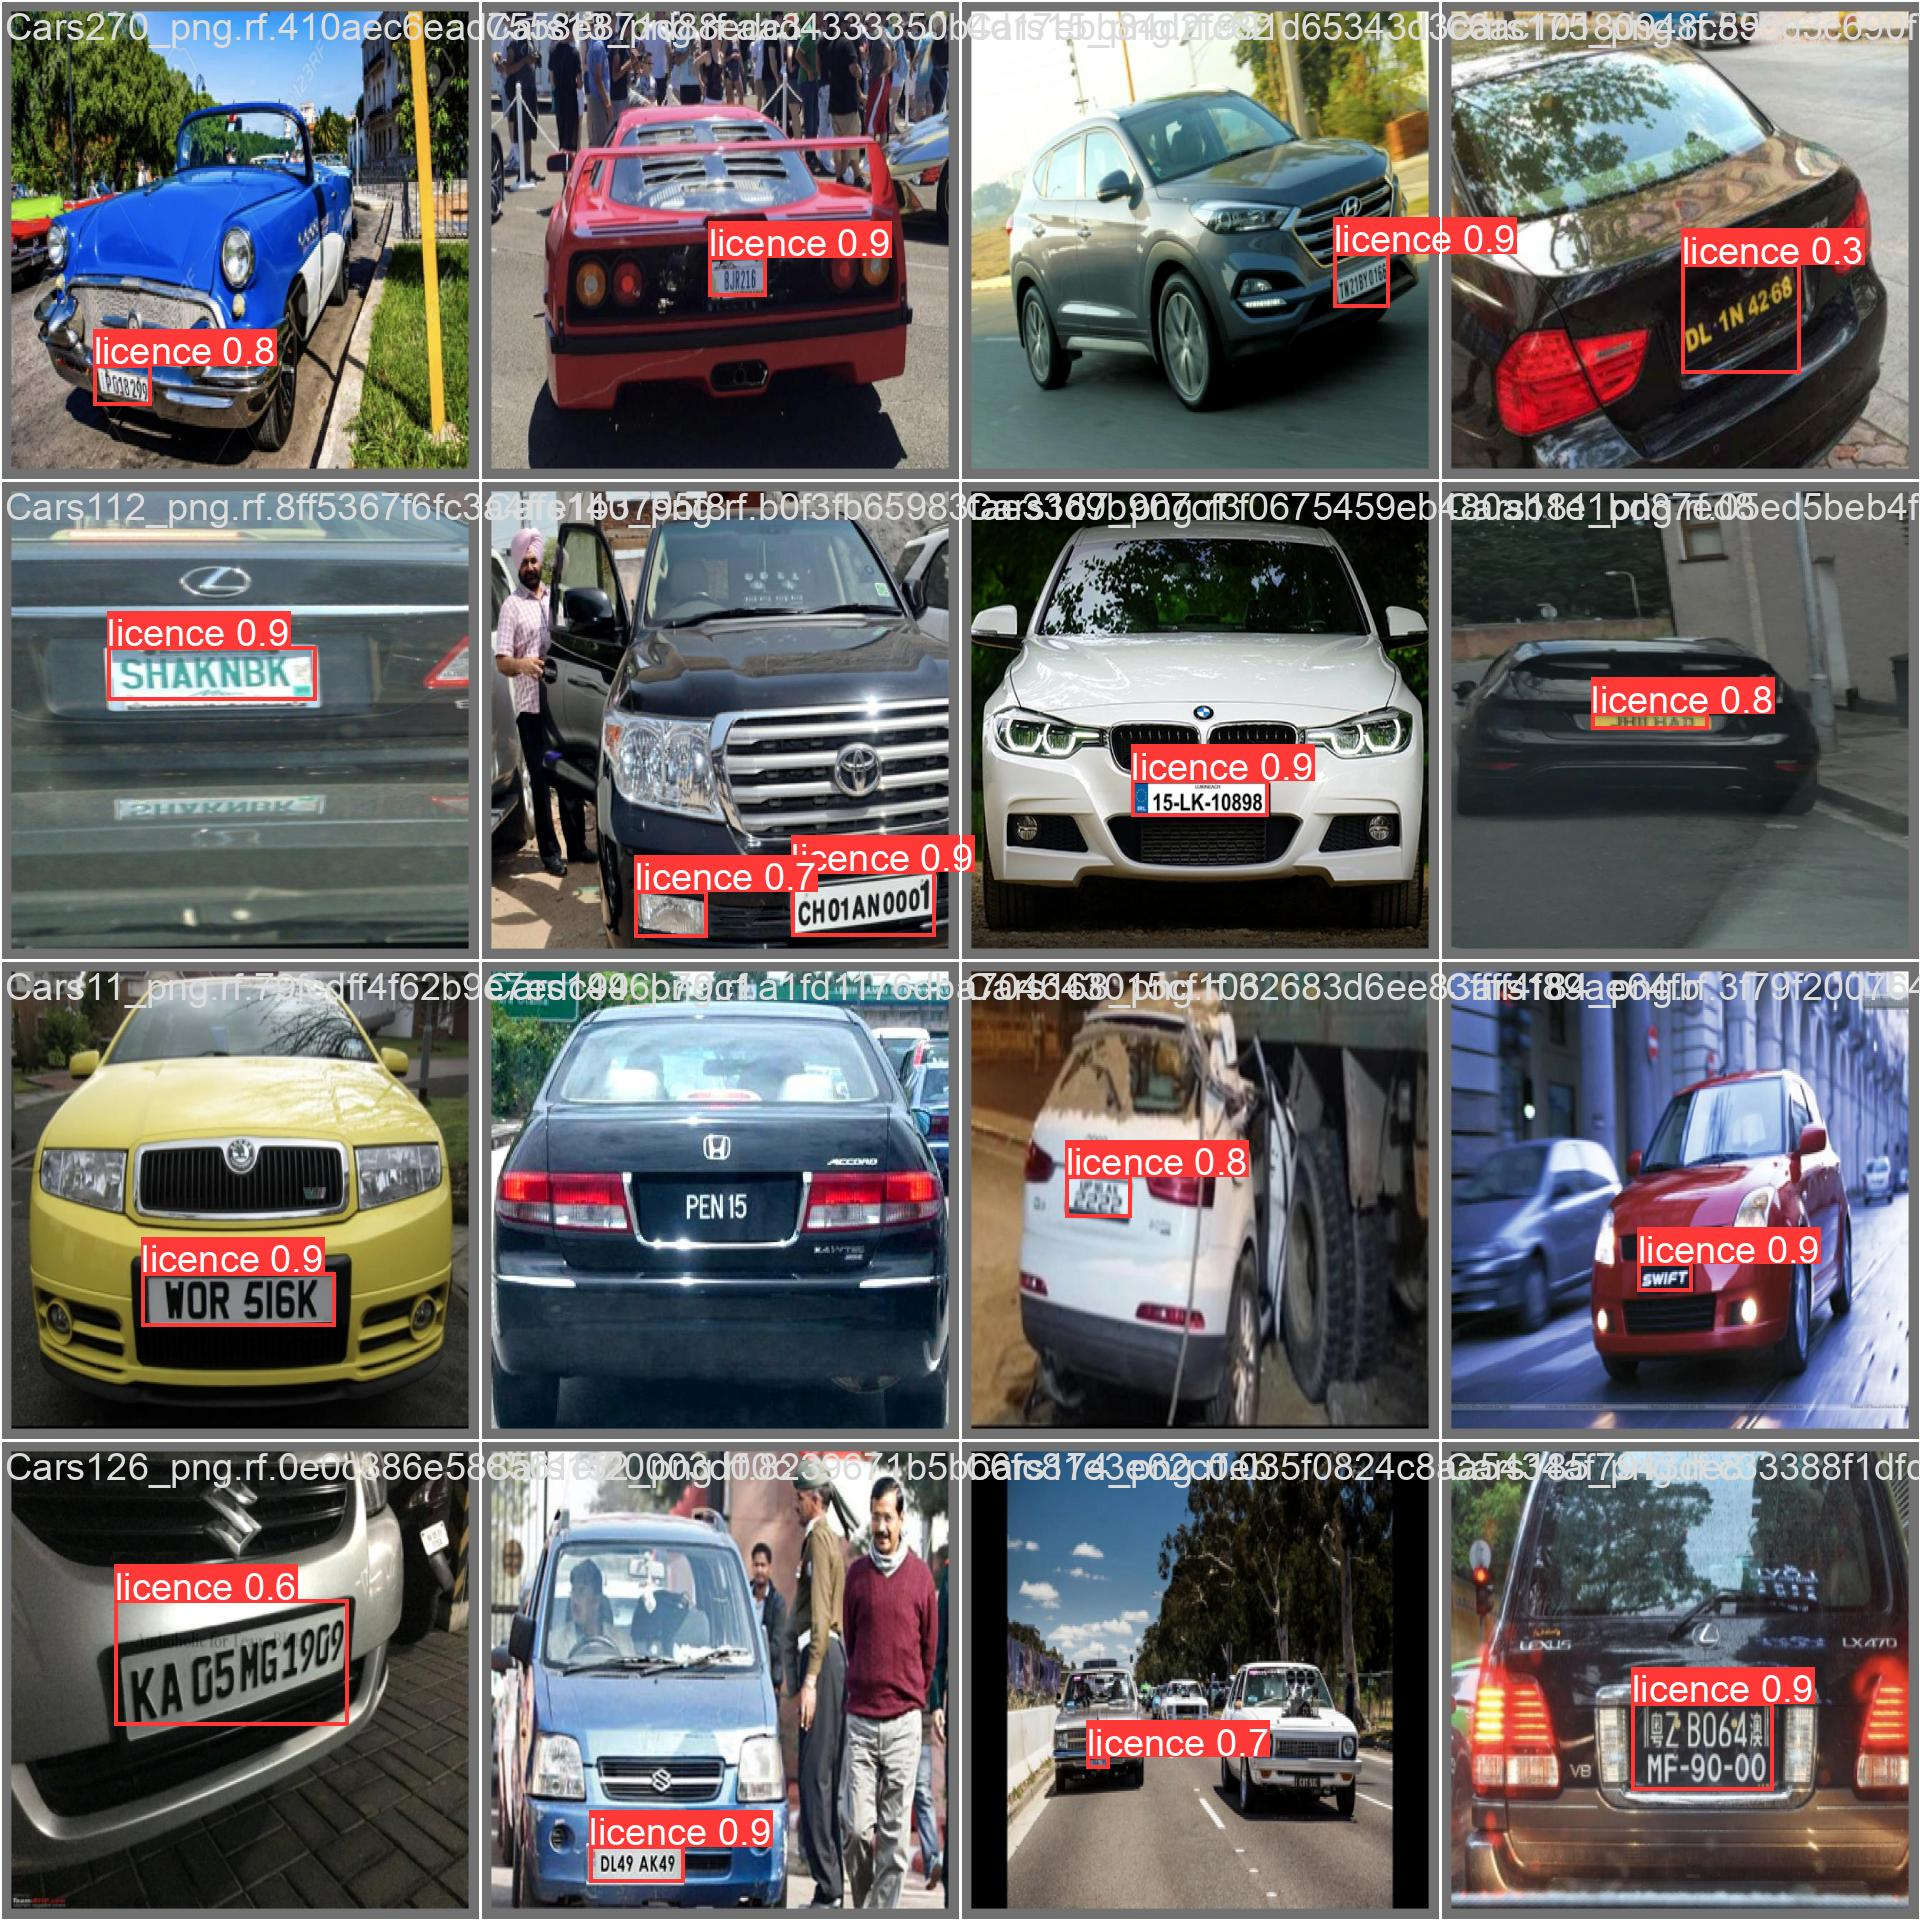

---------------------------------------------------------------------------------------------------- 



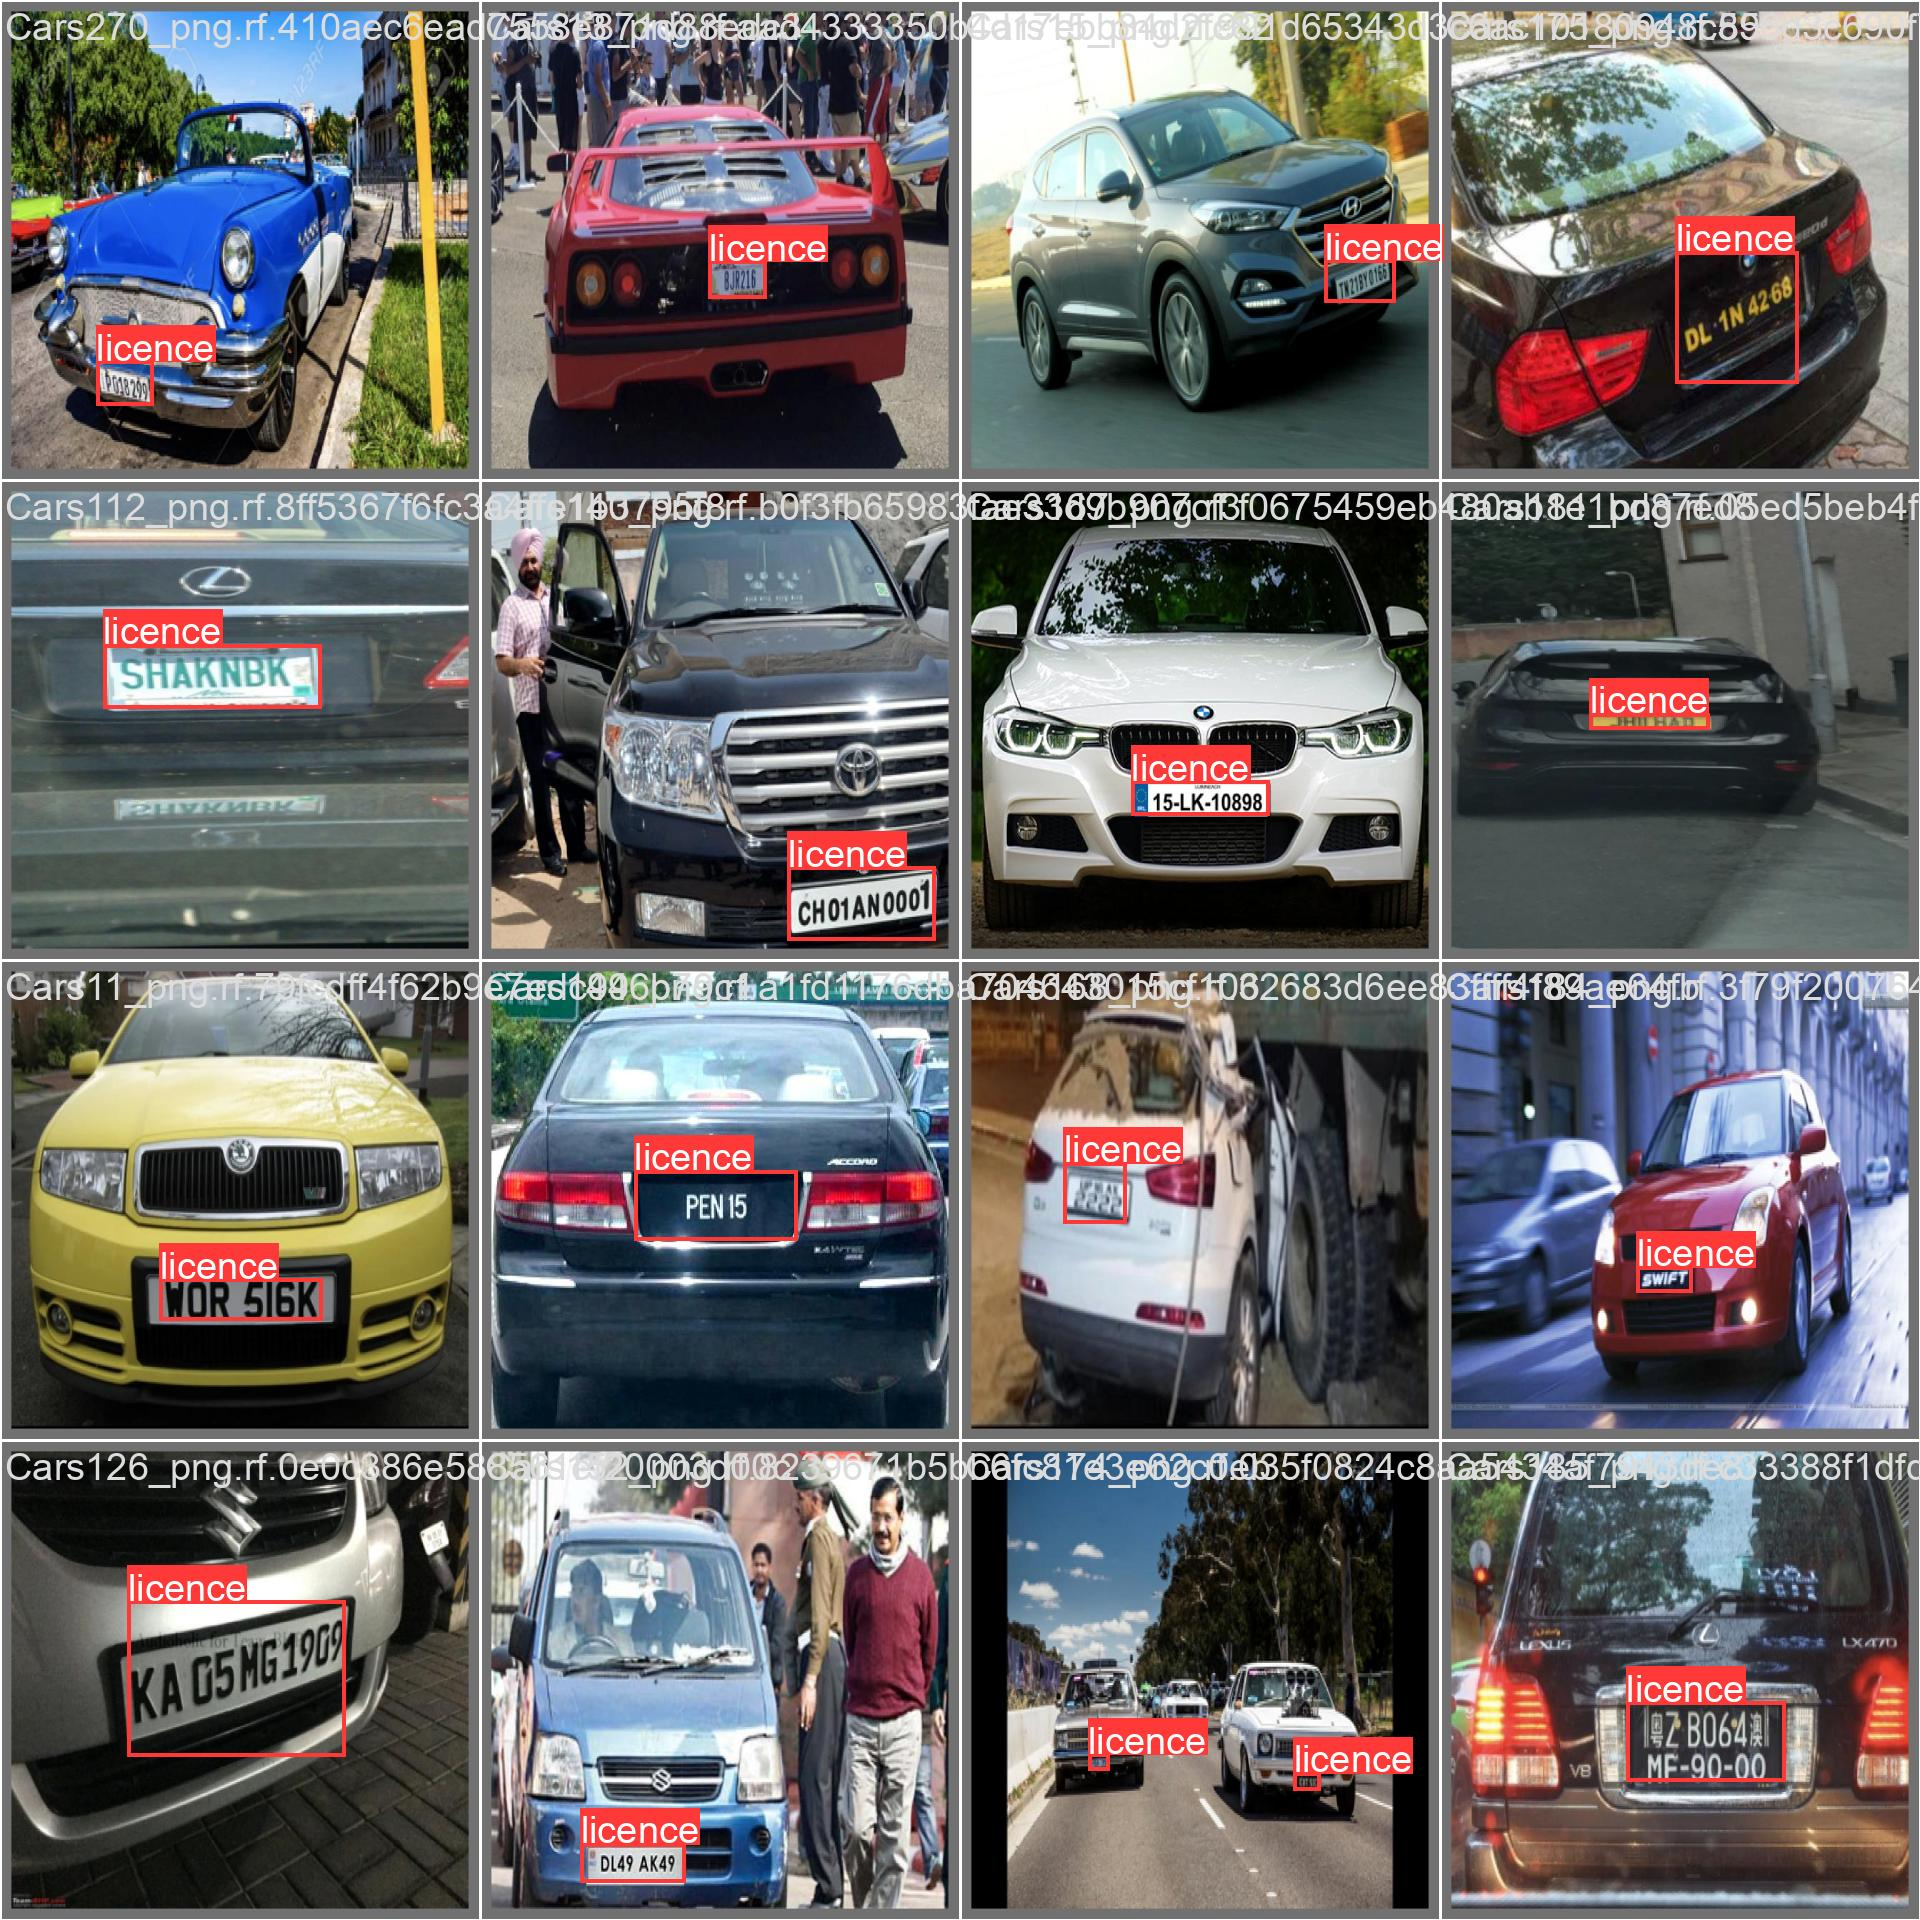

---------------------------------------------------------------------------------------------------- 



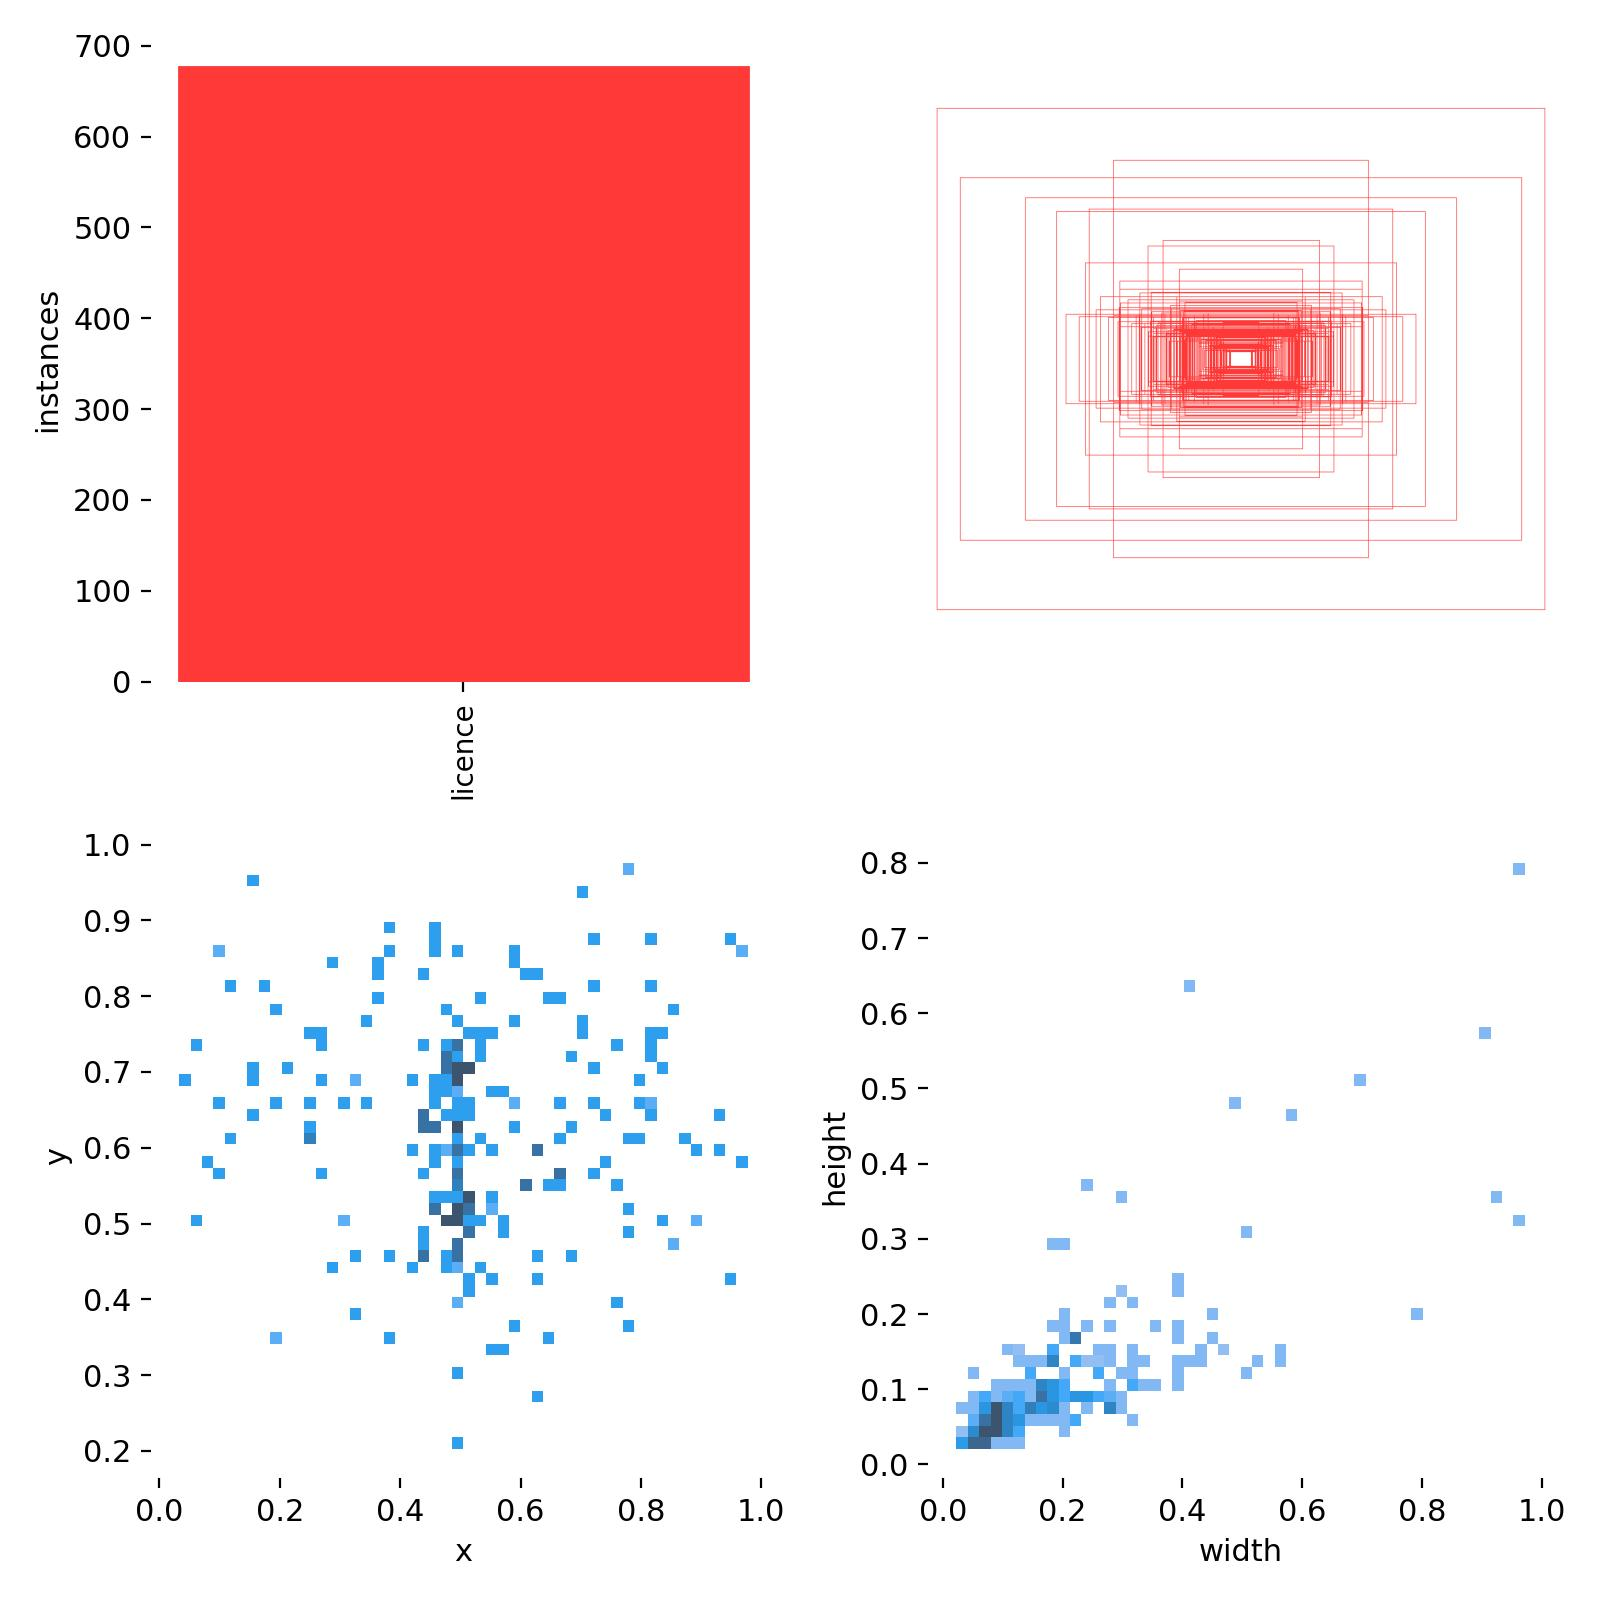

---------------------------------------------------------------------------------------------------- 



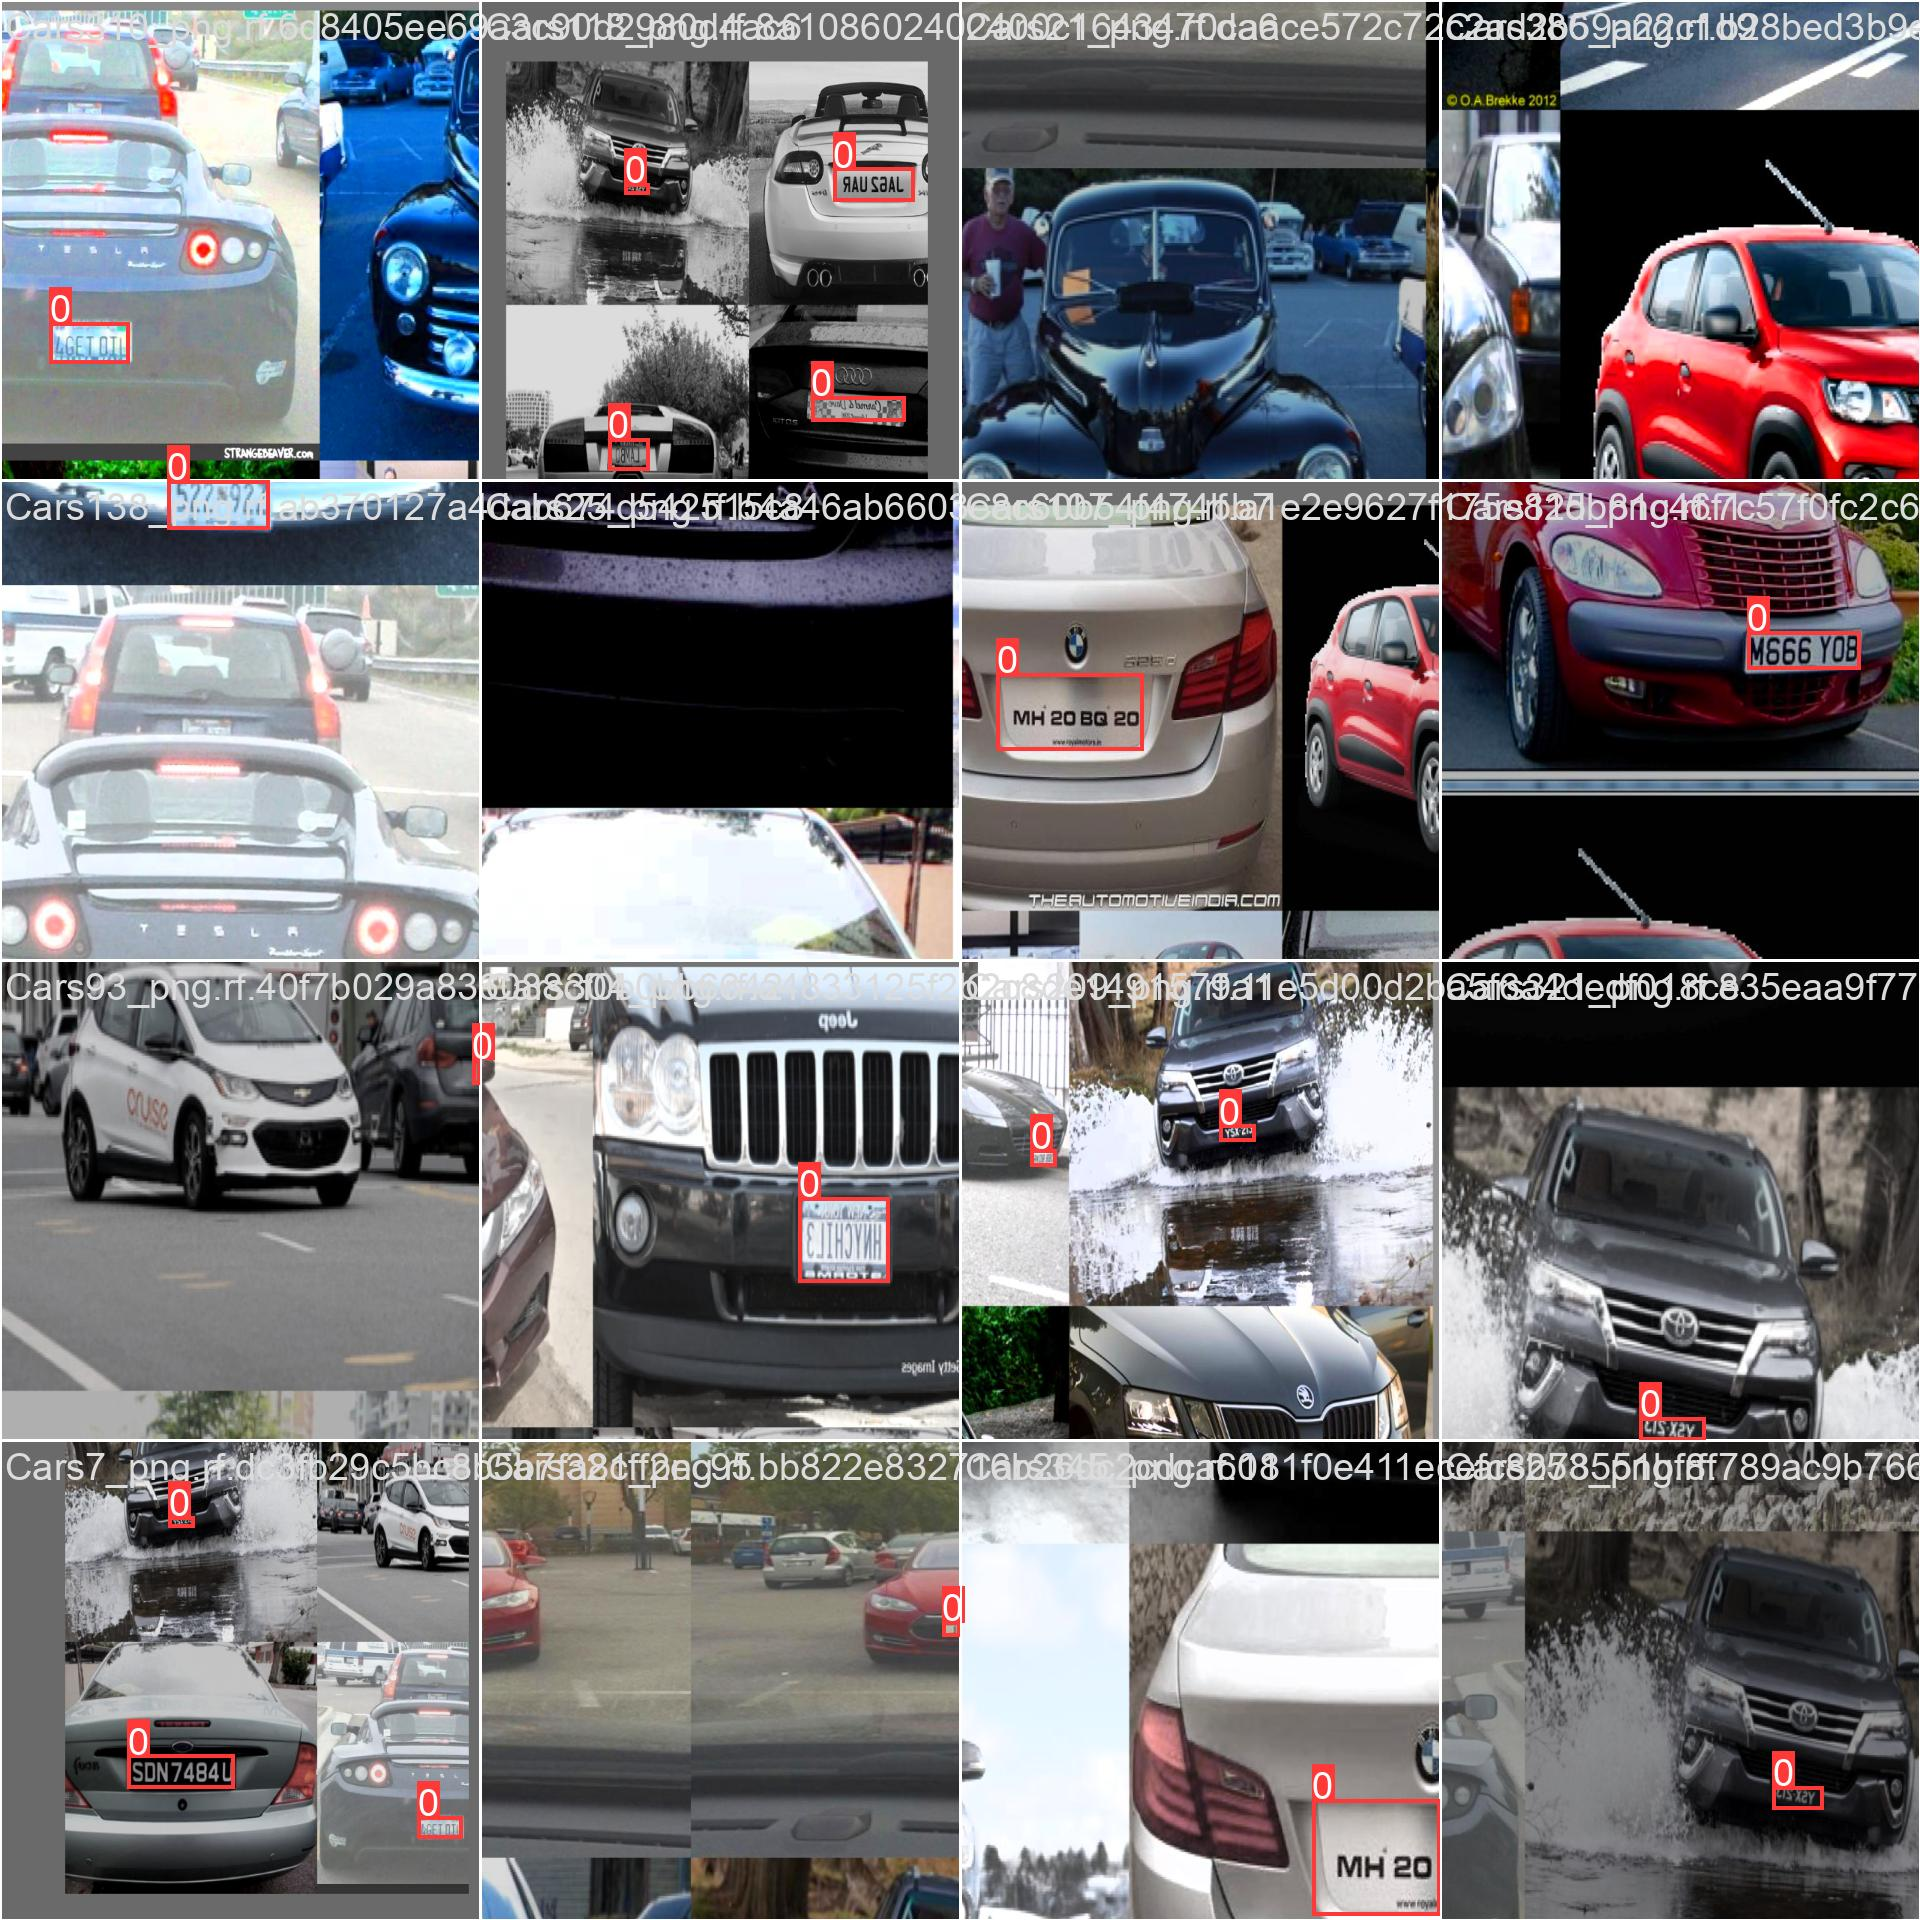

---------------------------------------------------------------------------------------------------- 



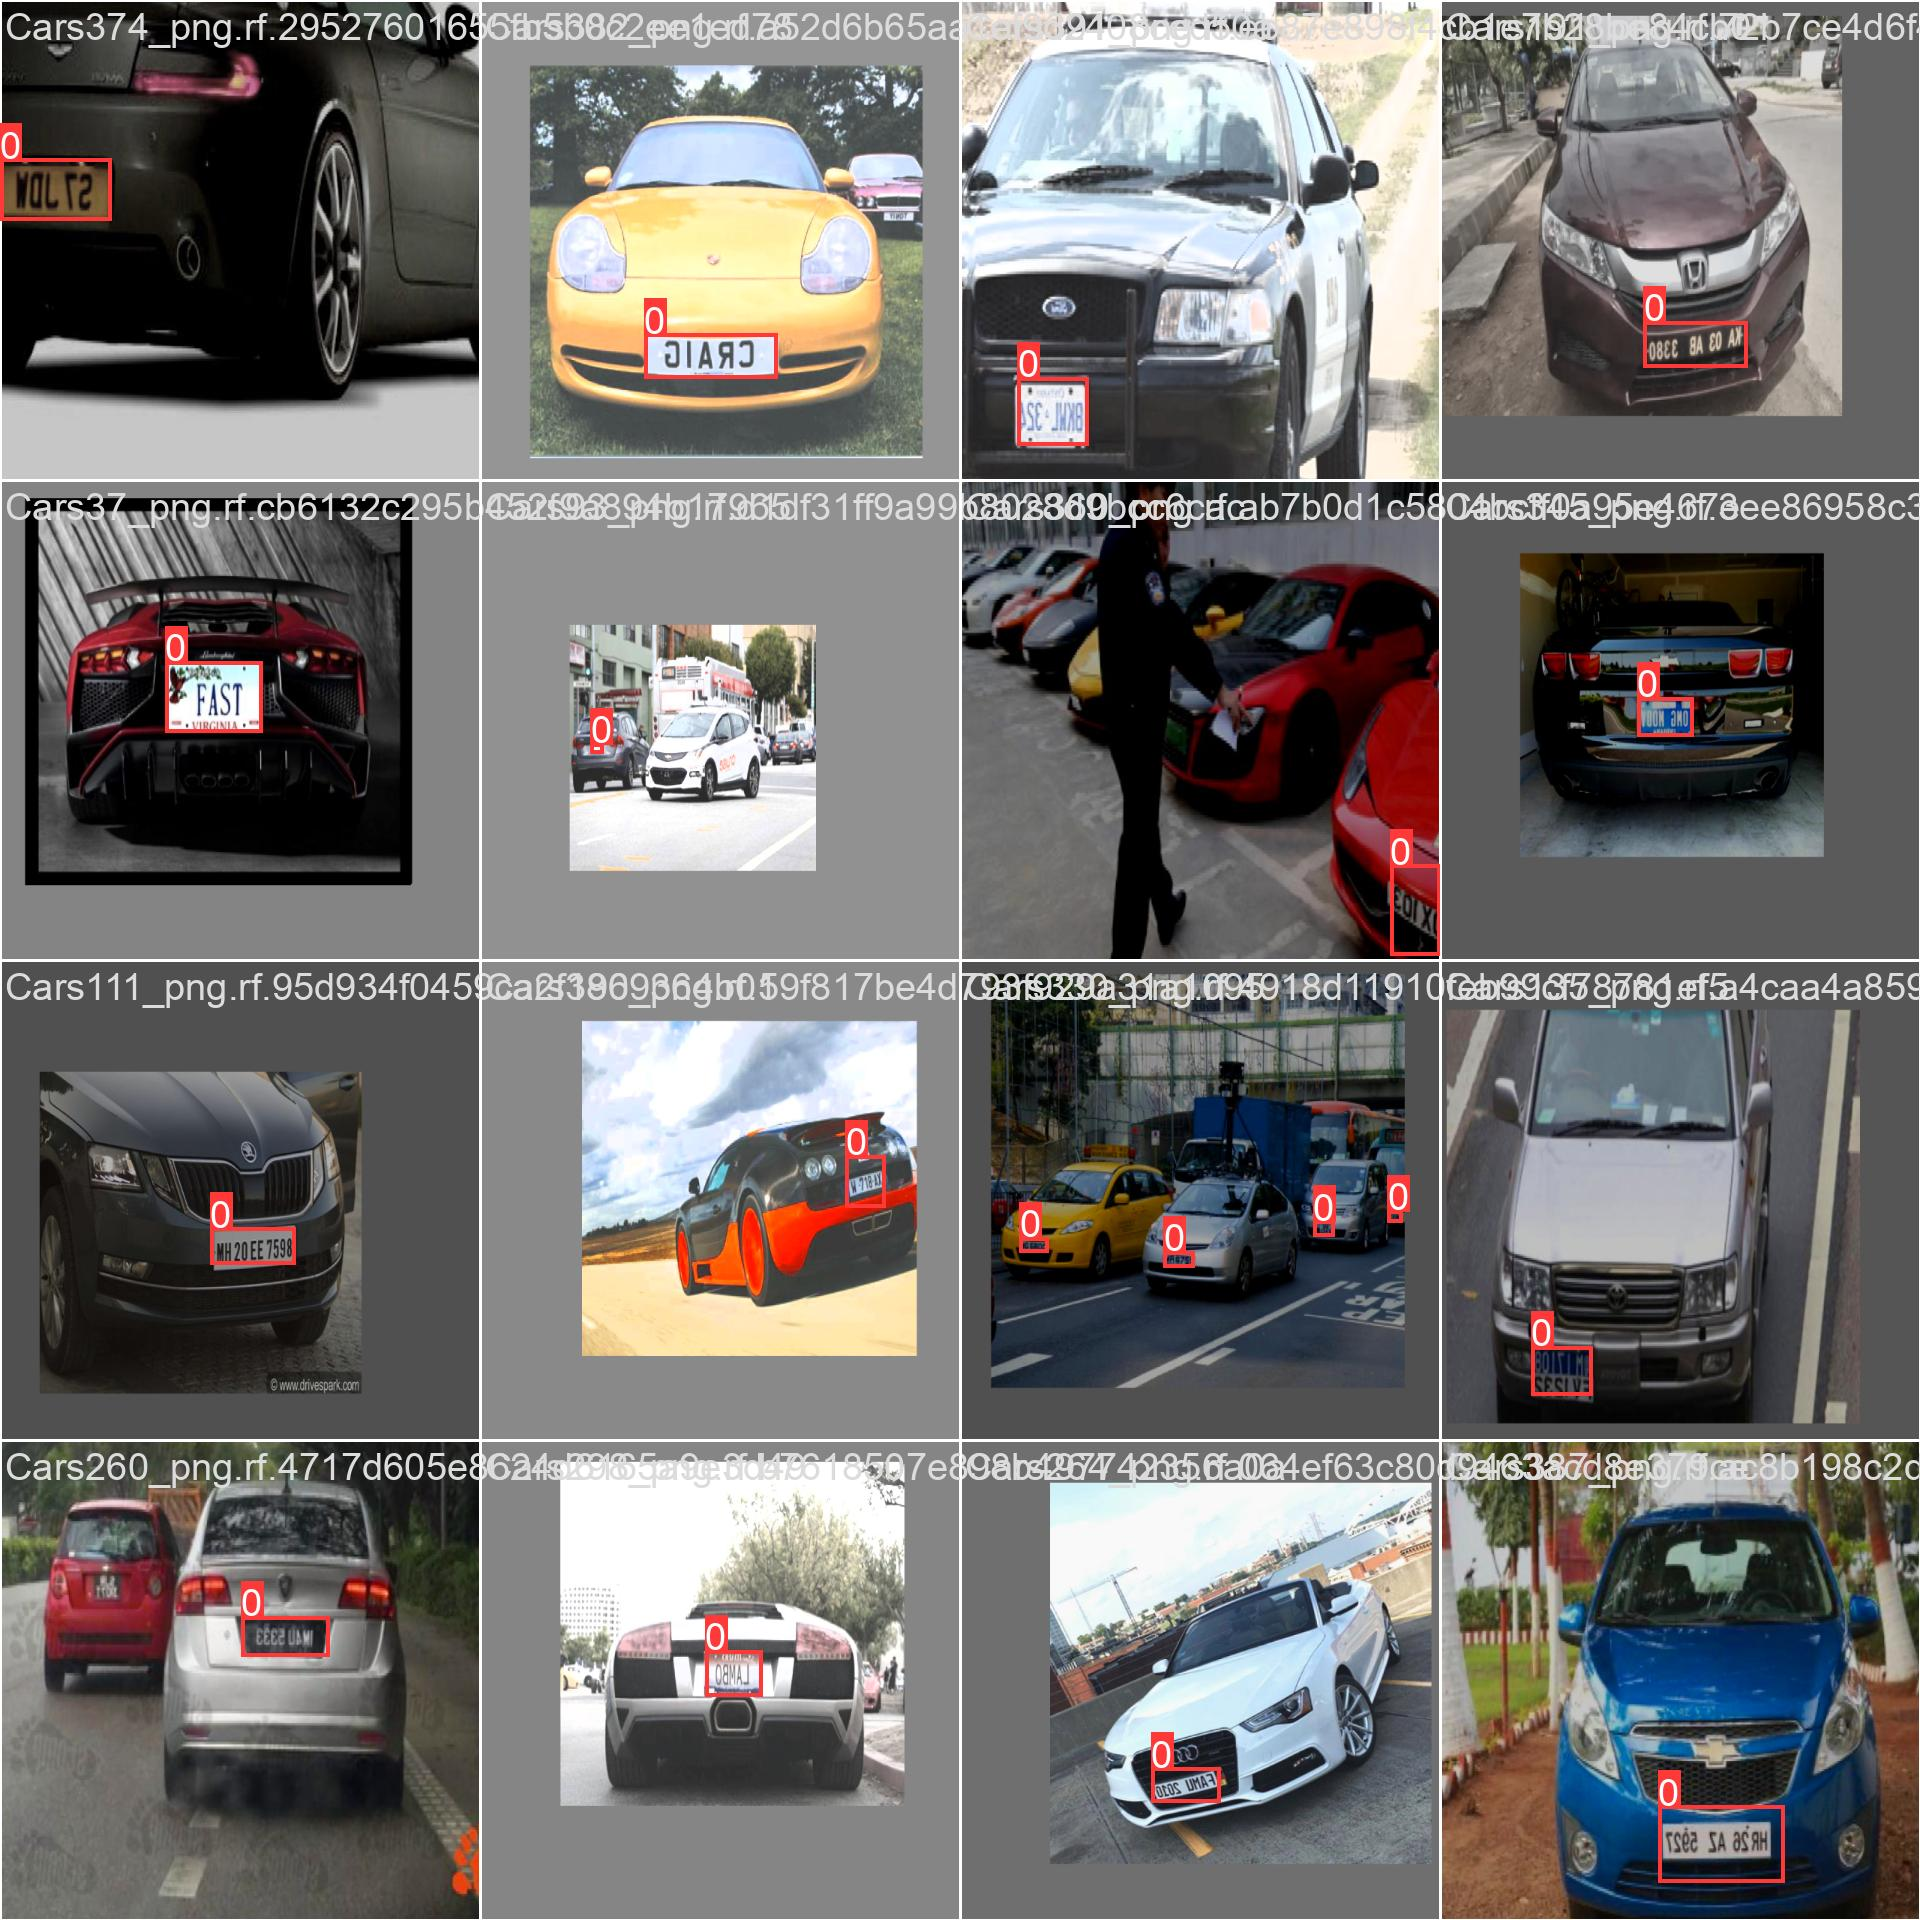

---------------------------------------------------------------------------------------------------- 



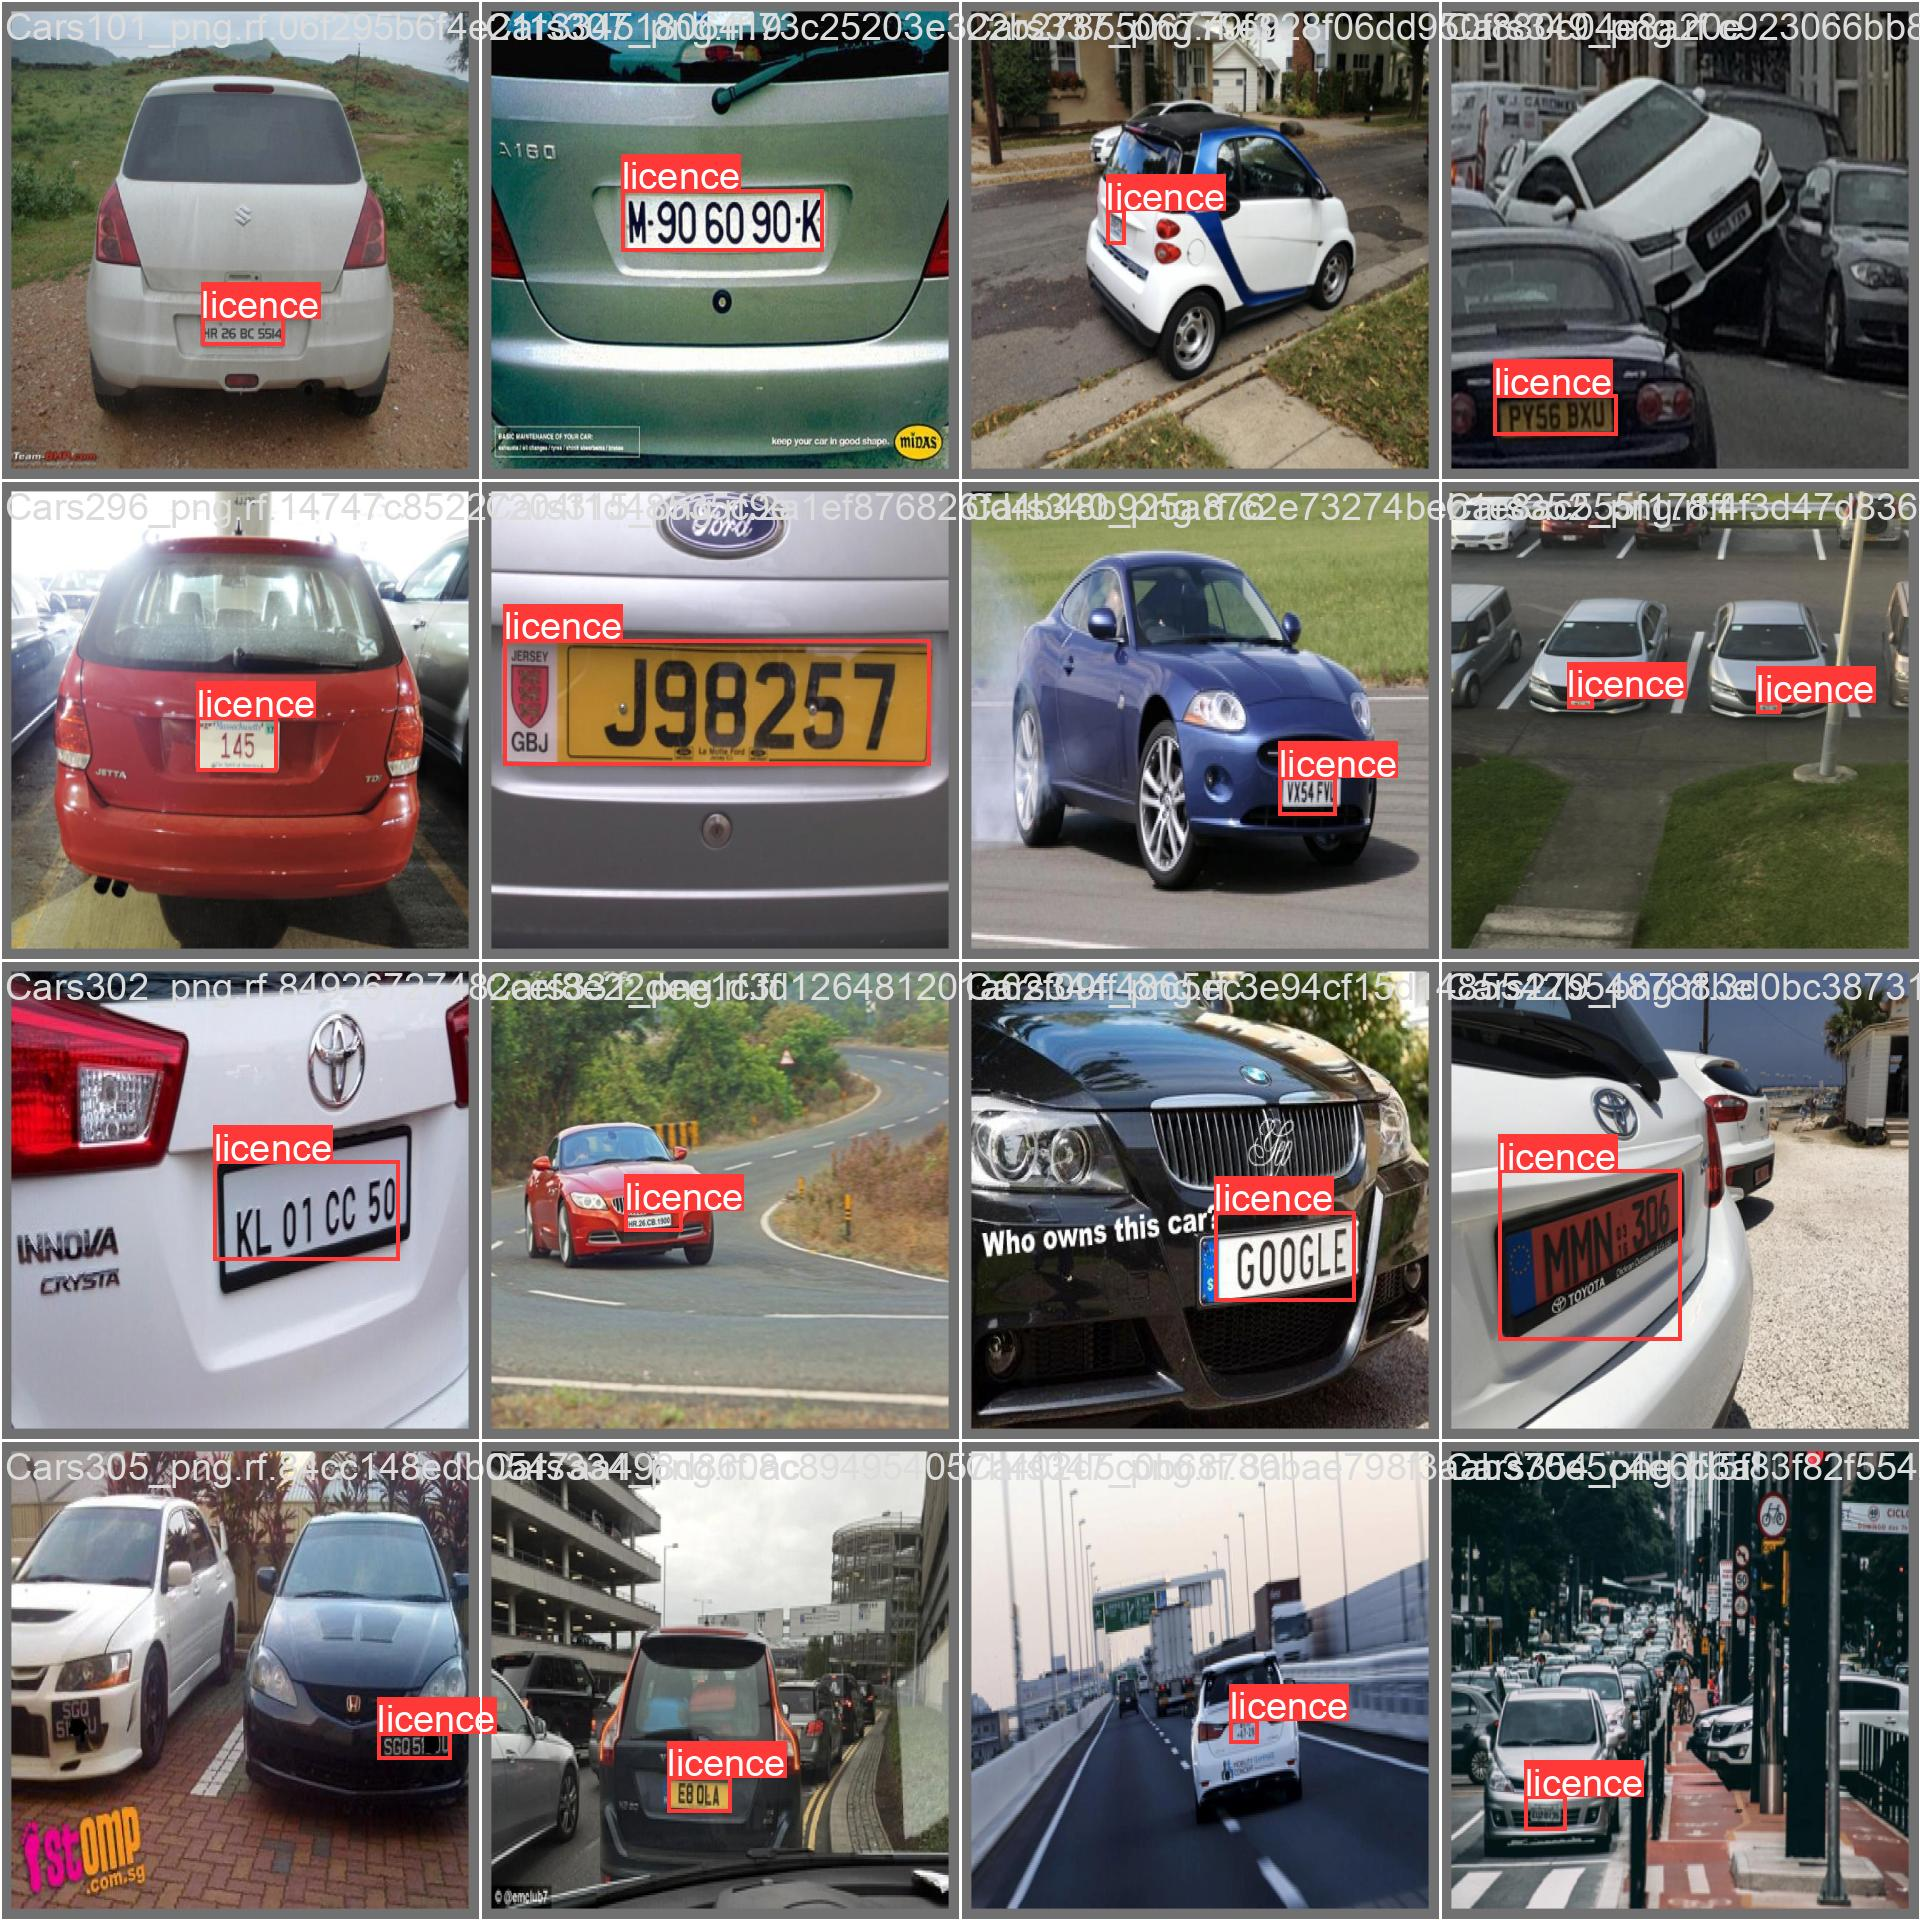

---------------------------------------------------------------------------------------------------- 



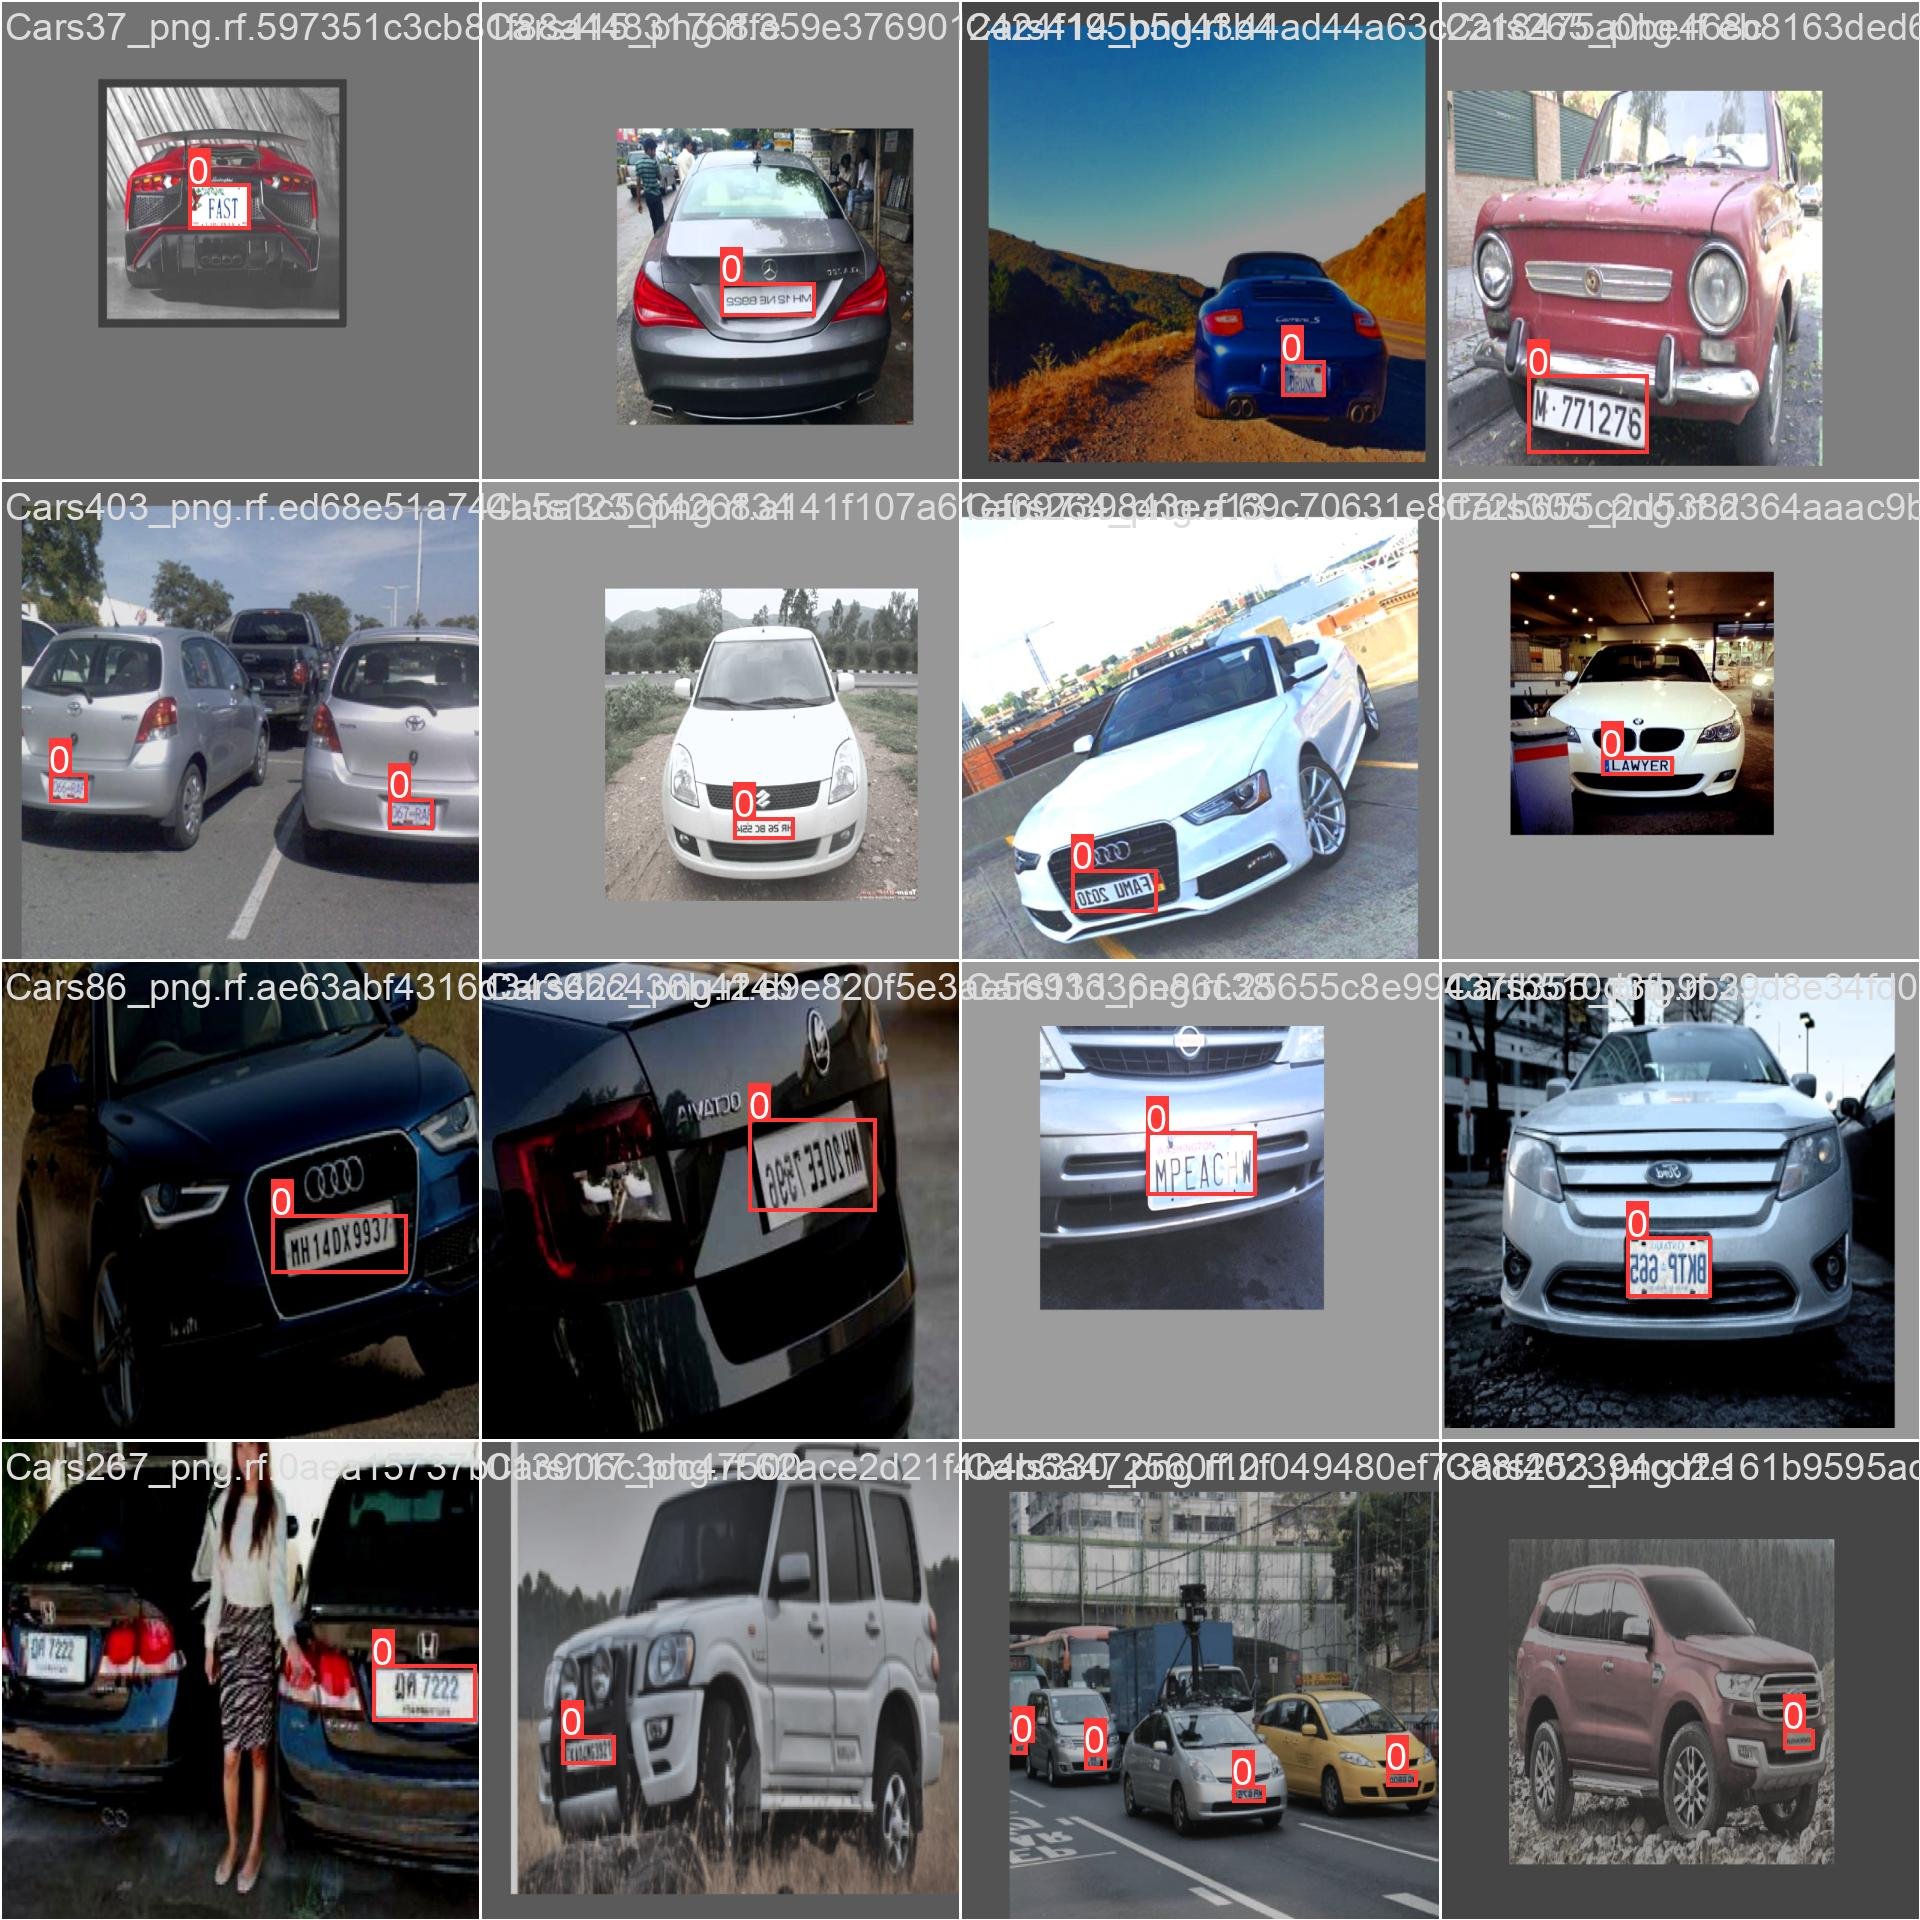

---------------------------------------------------------------------------------------------------- 



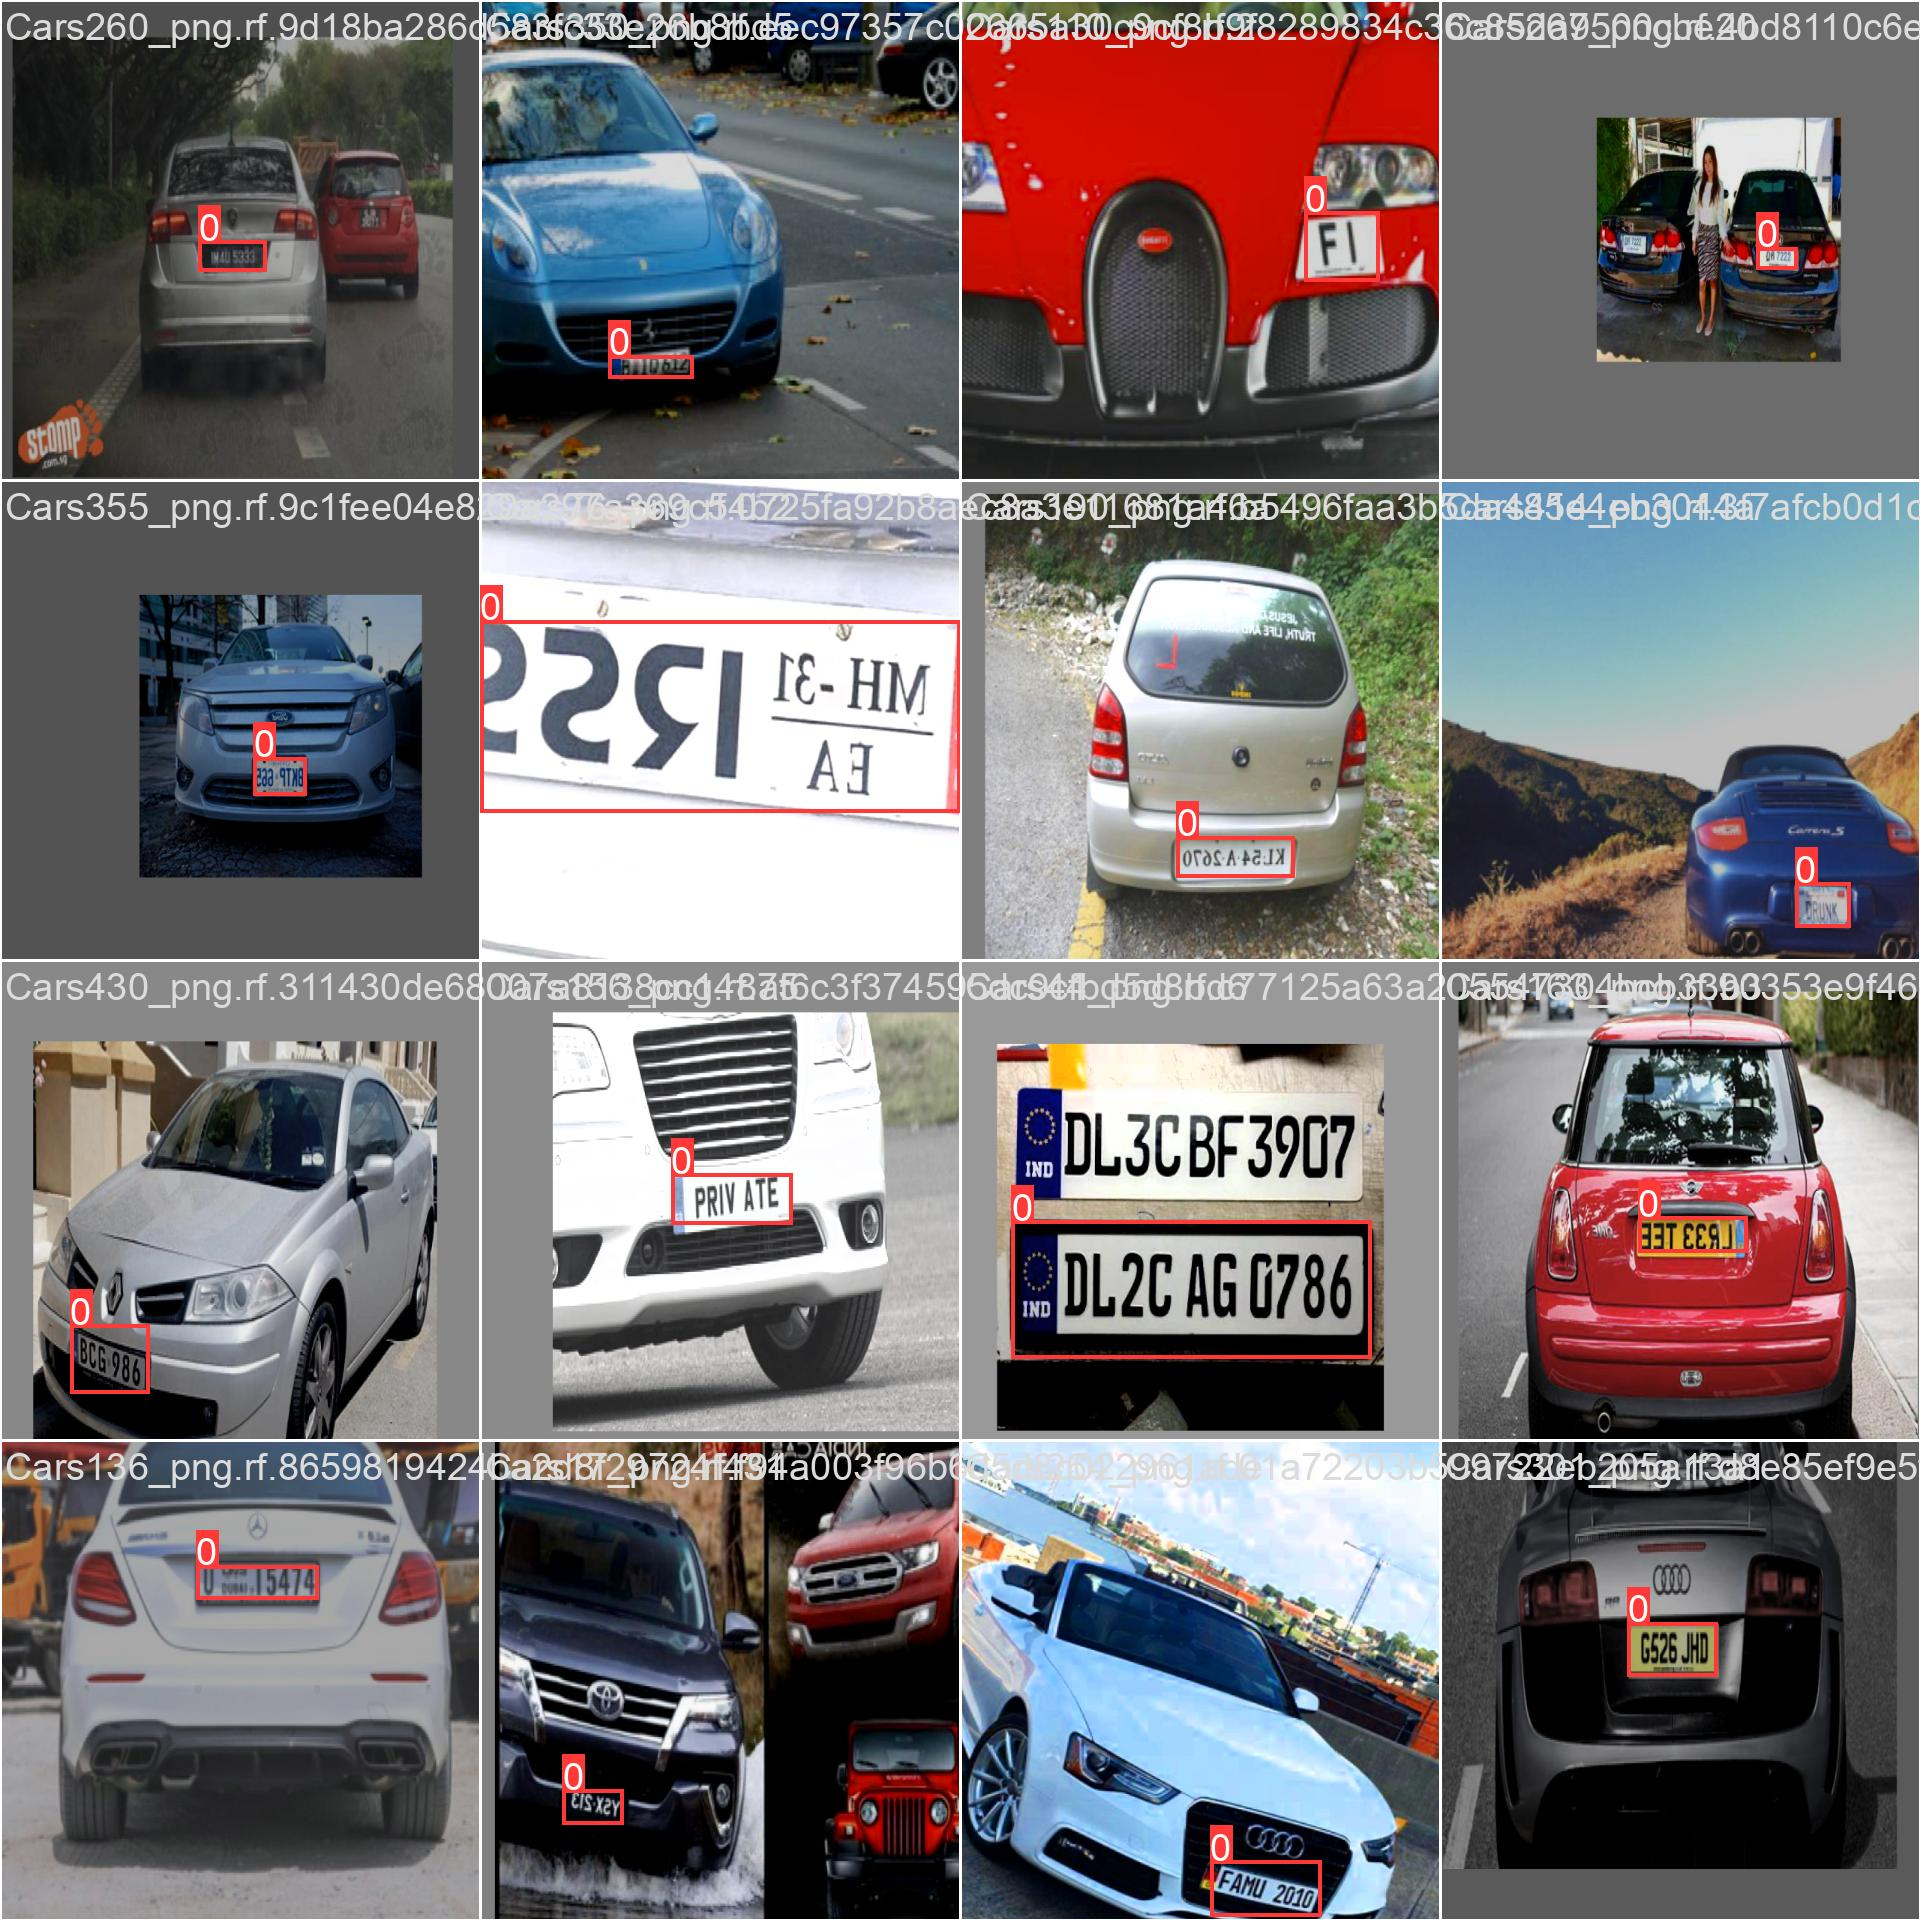

---------------------------------------------------------------------------------------------------- 



In [16]:
for image_path in glob.glob(r'/content/runs/detect/train3/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("-"*100, "\n")

### Evaluation Metrics

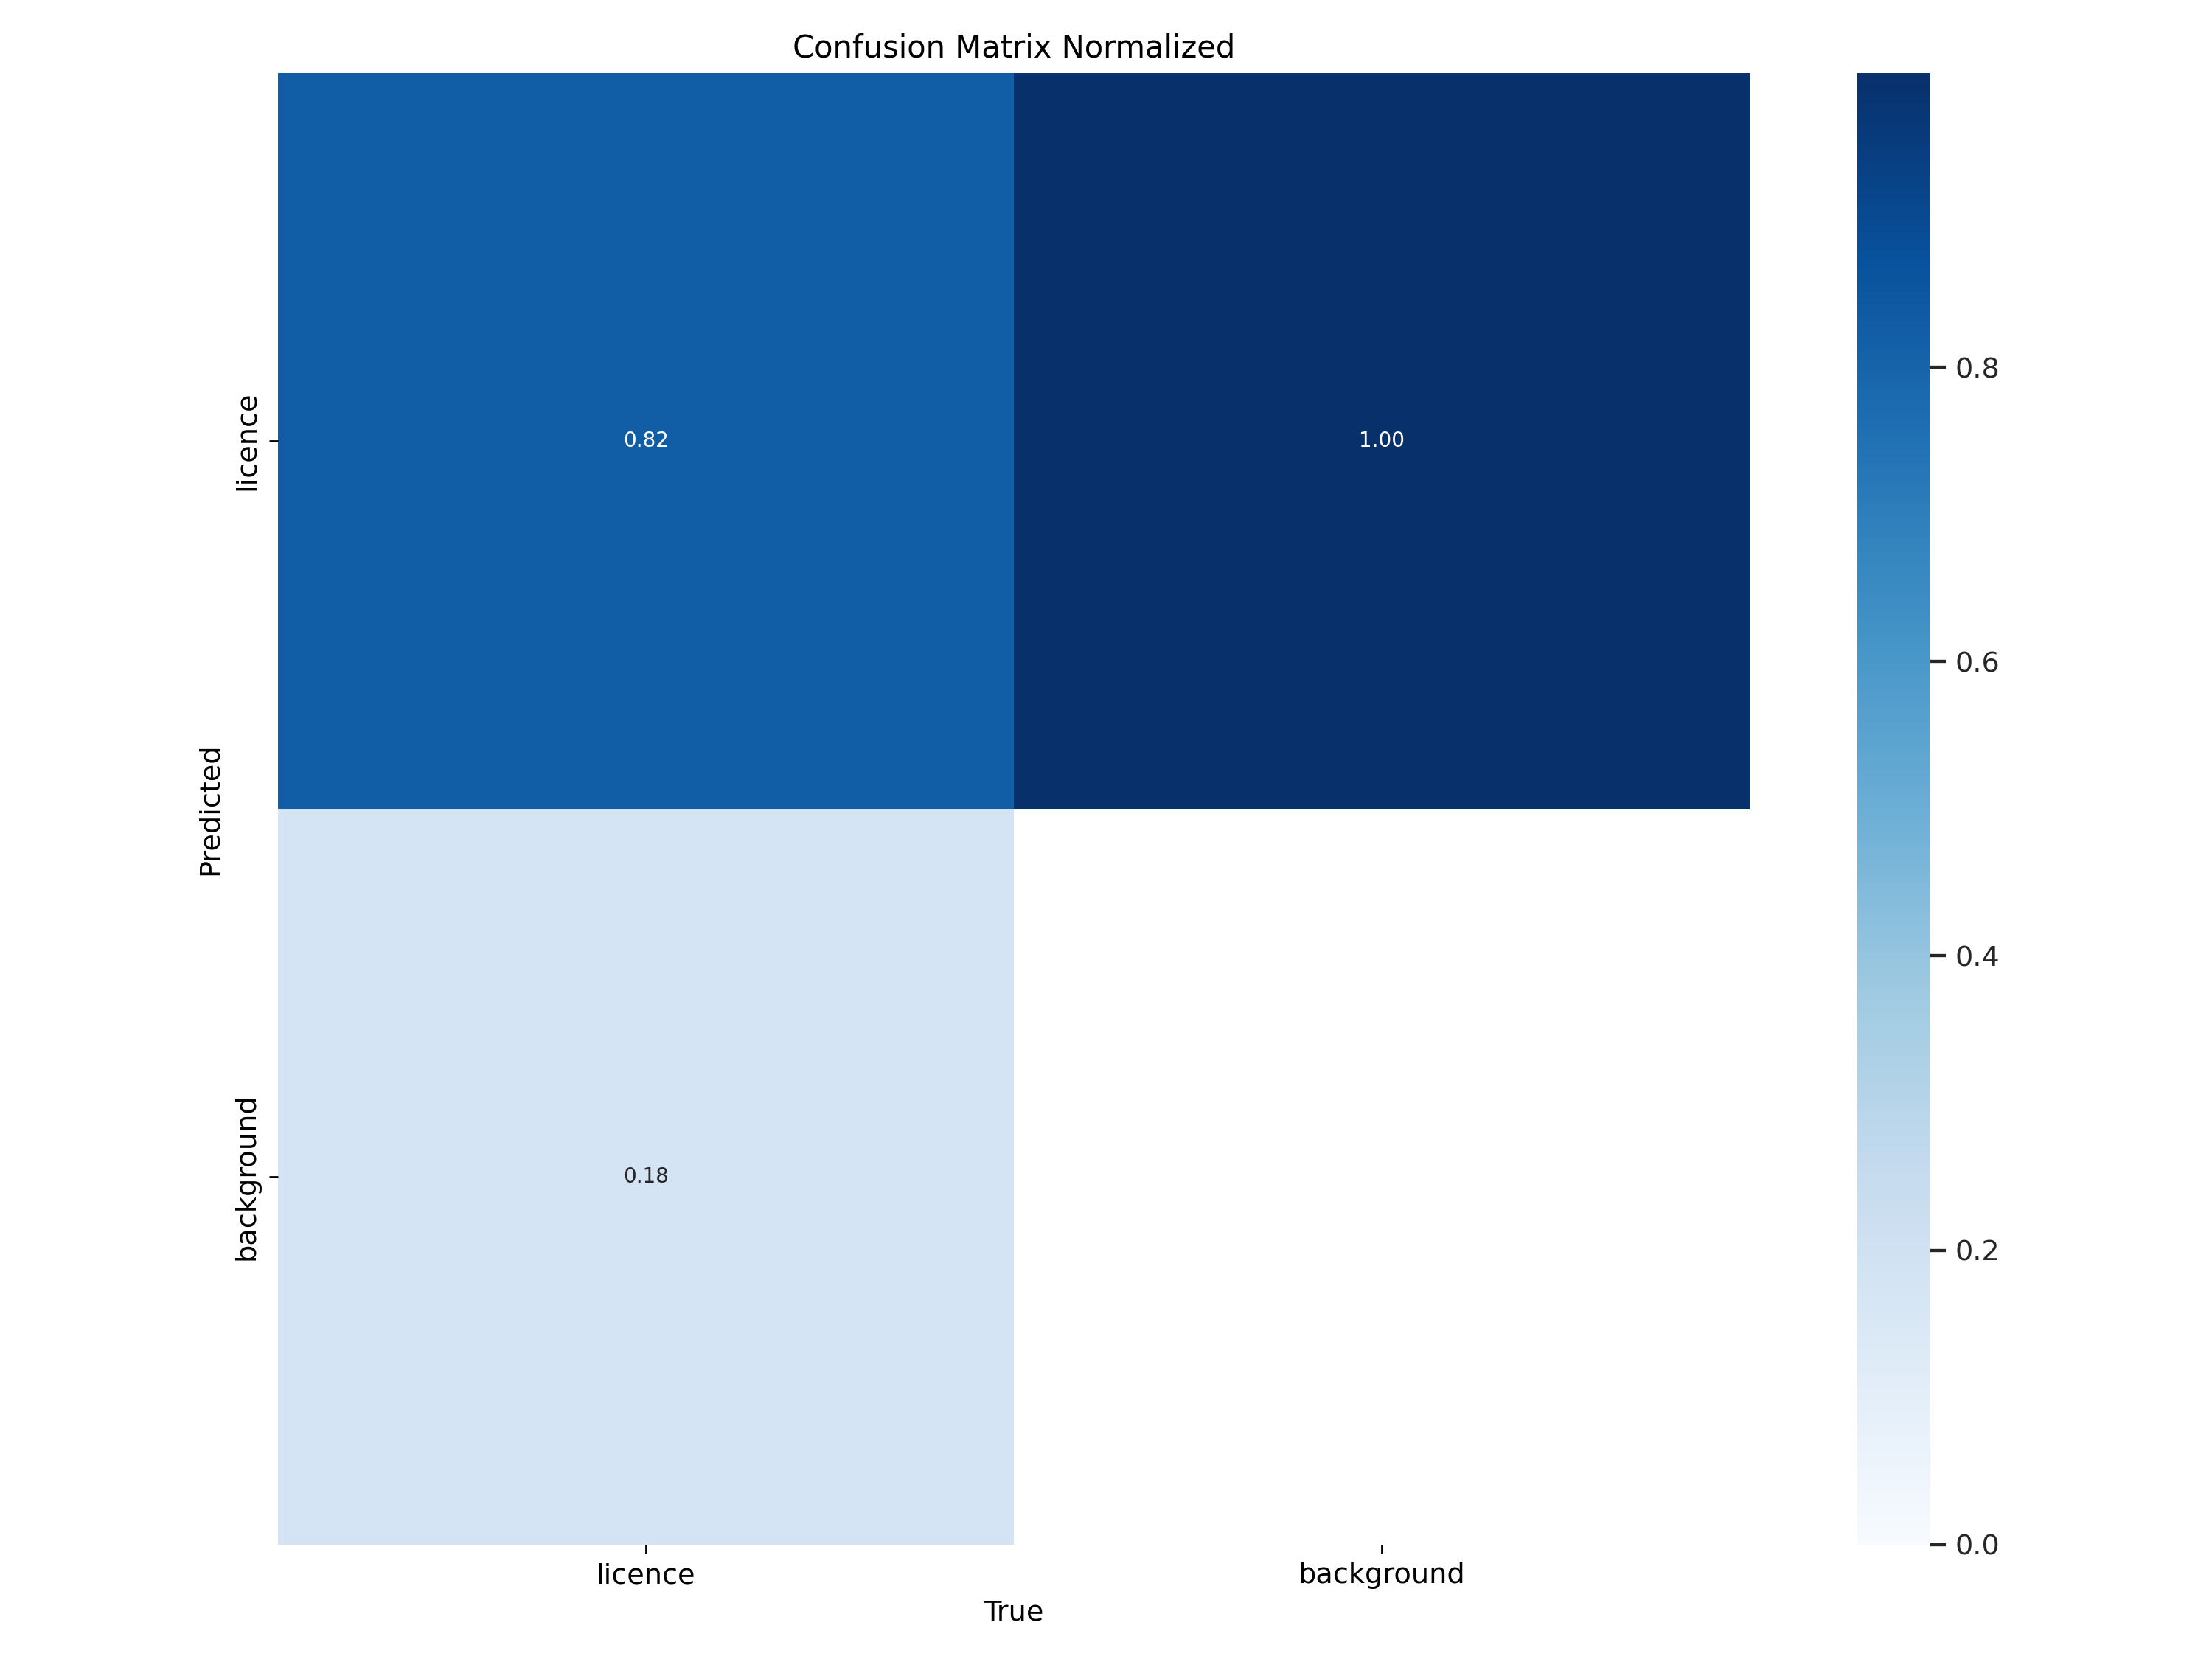

---------------------------------------------------------------------------------------------------- 



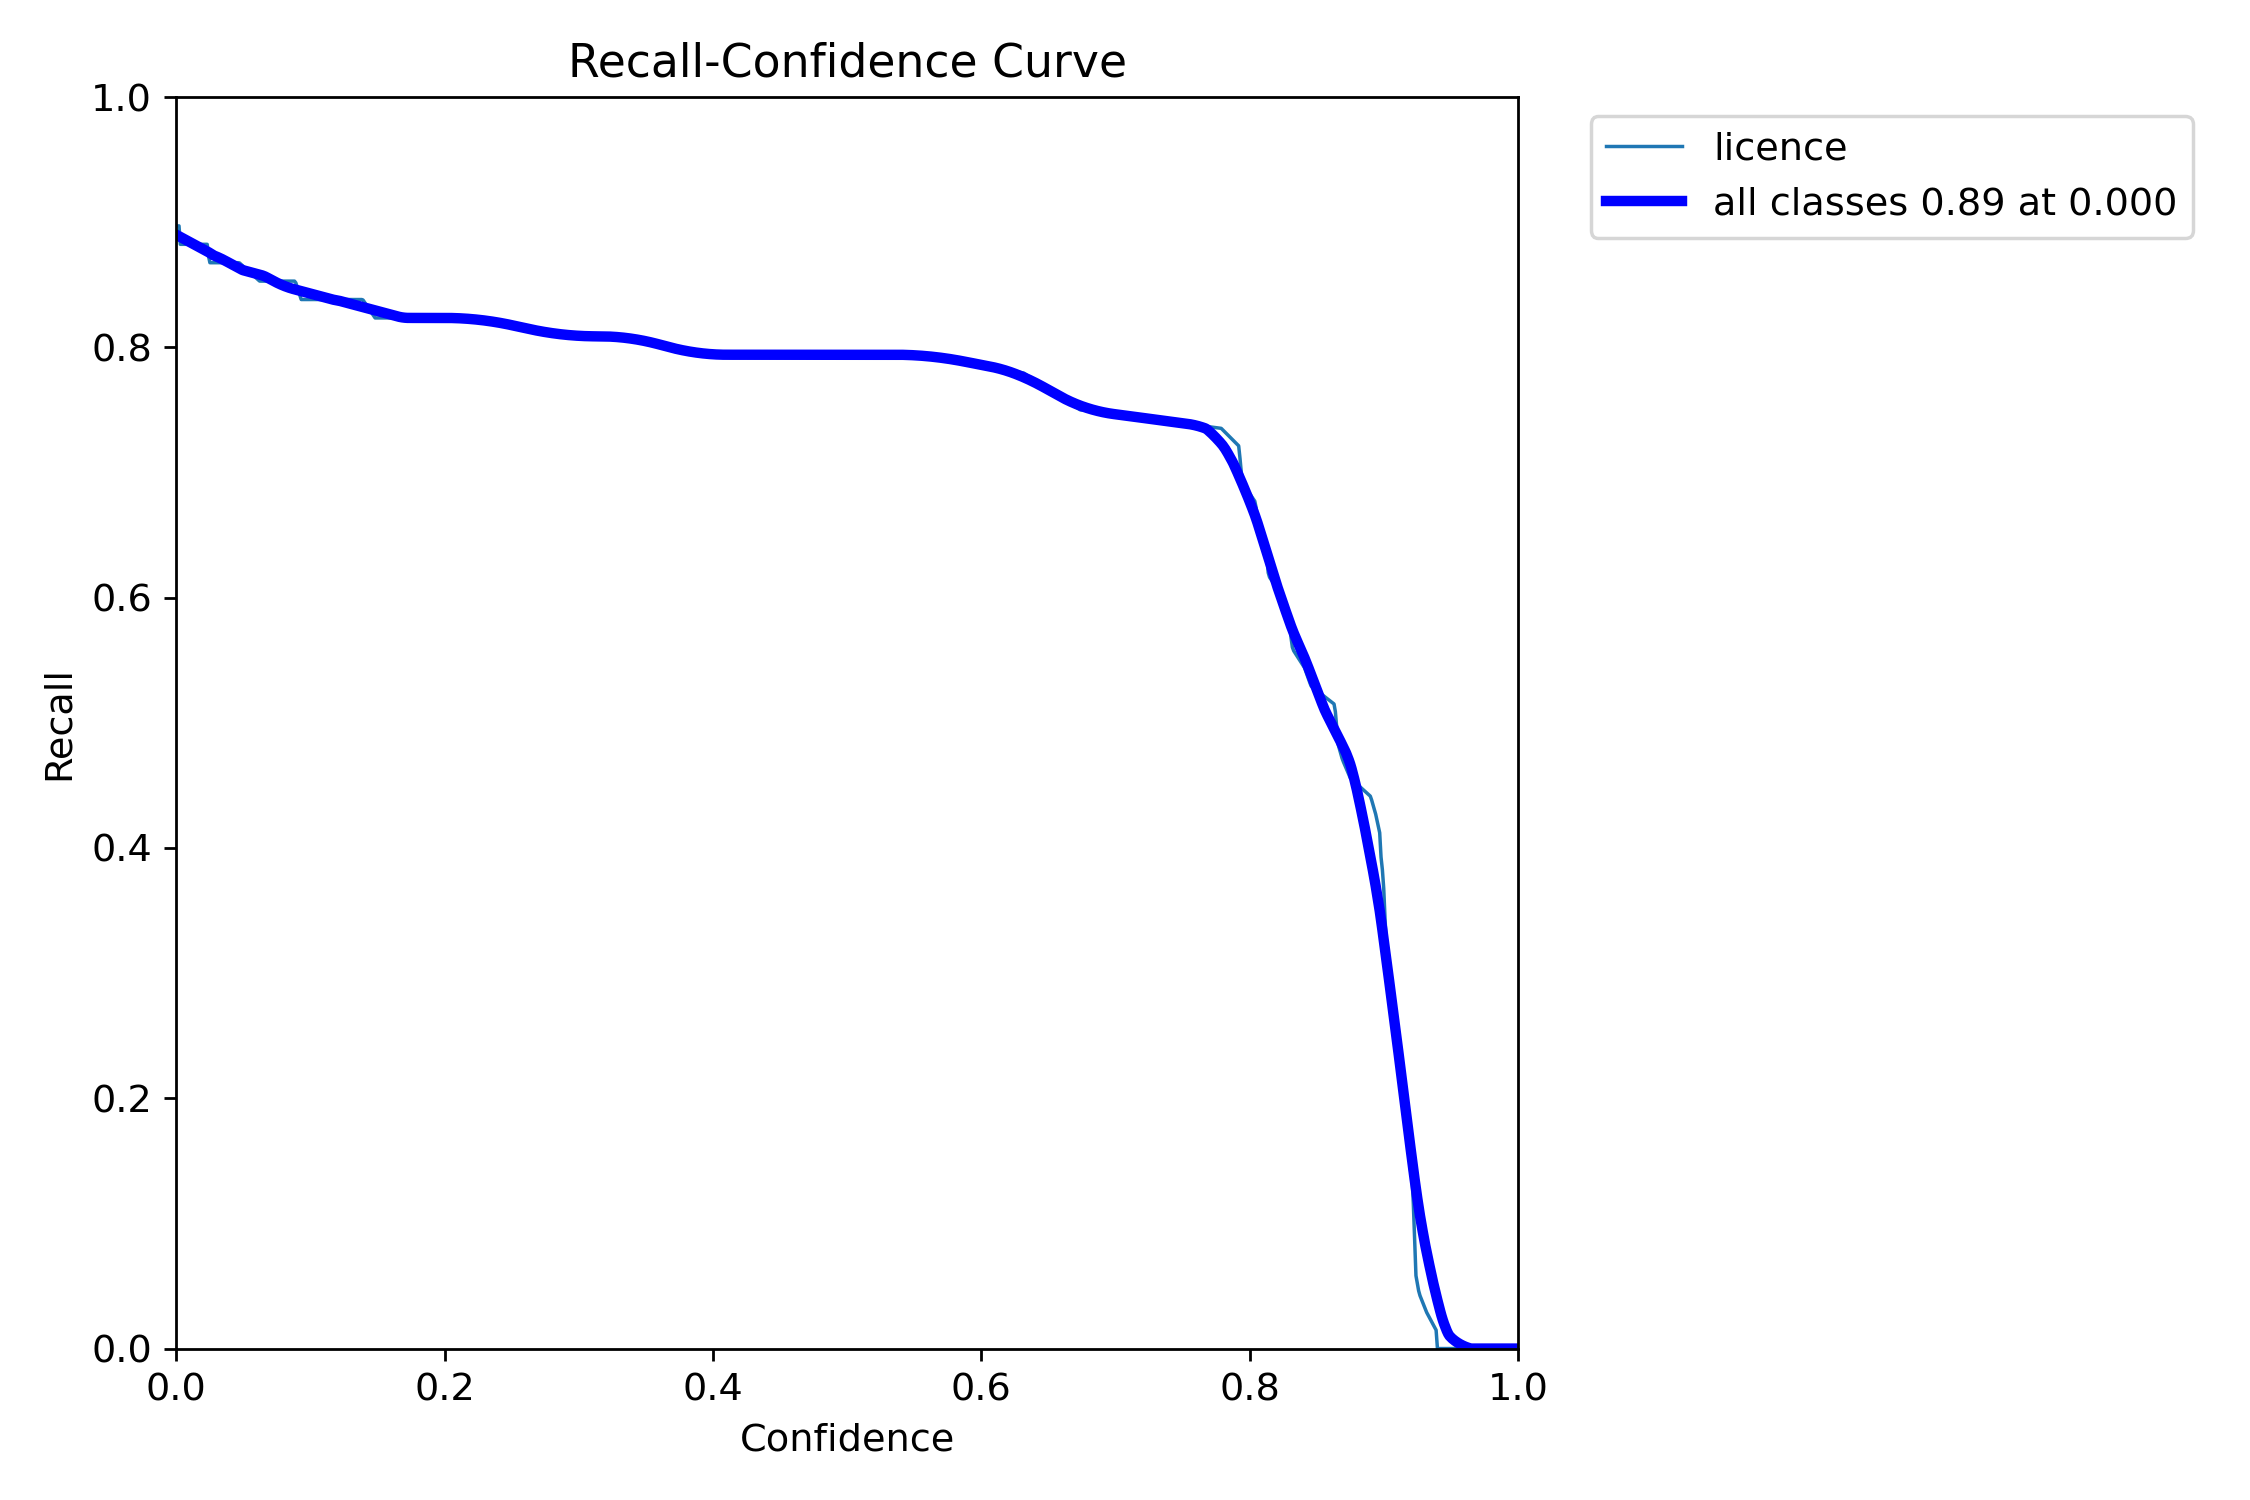

---------------------------------------------------------------------------------------------------- 



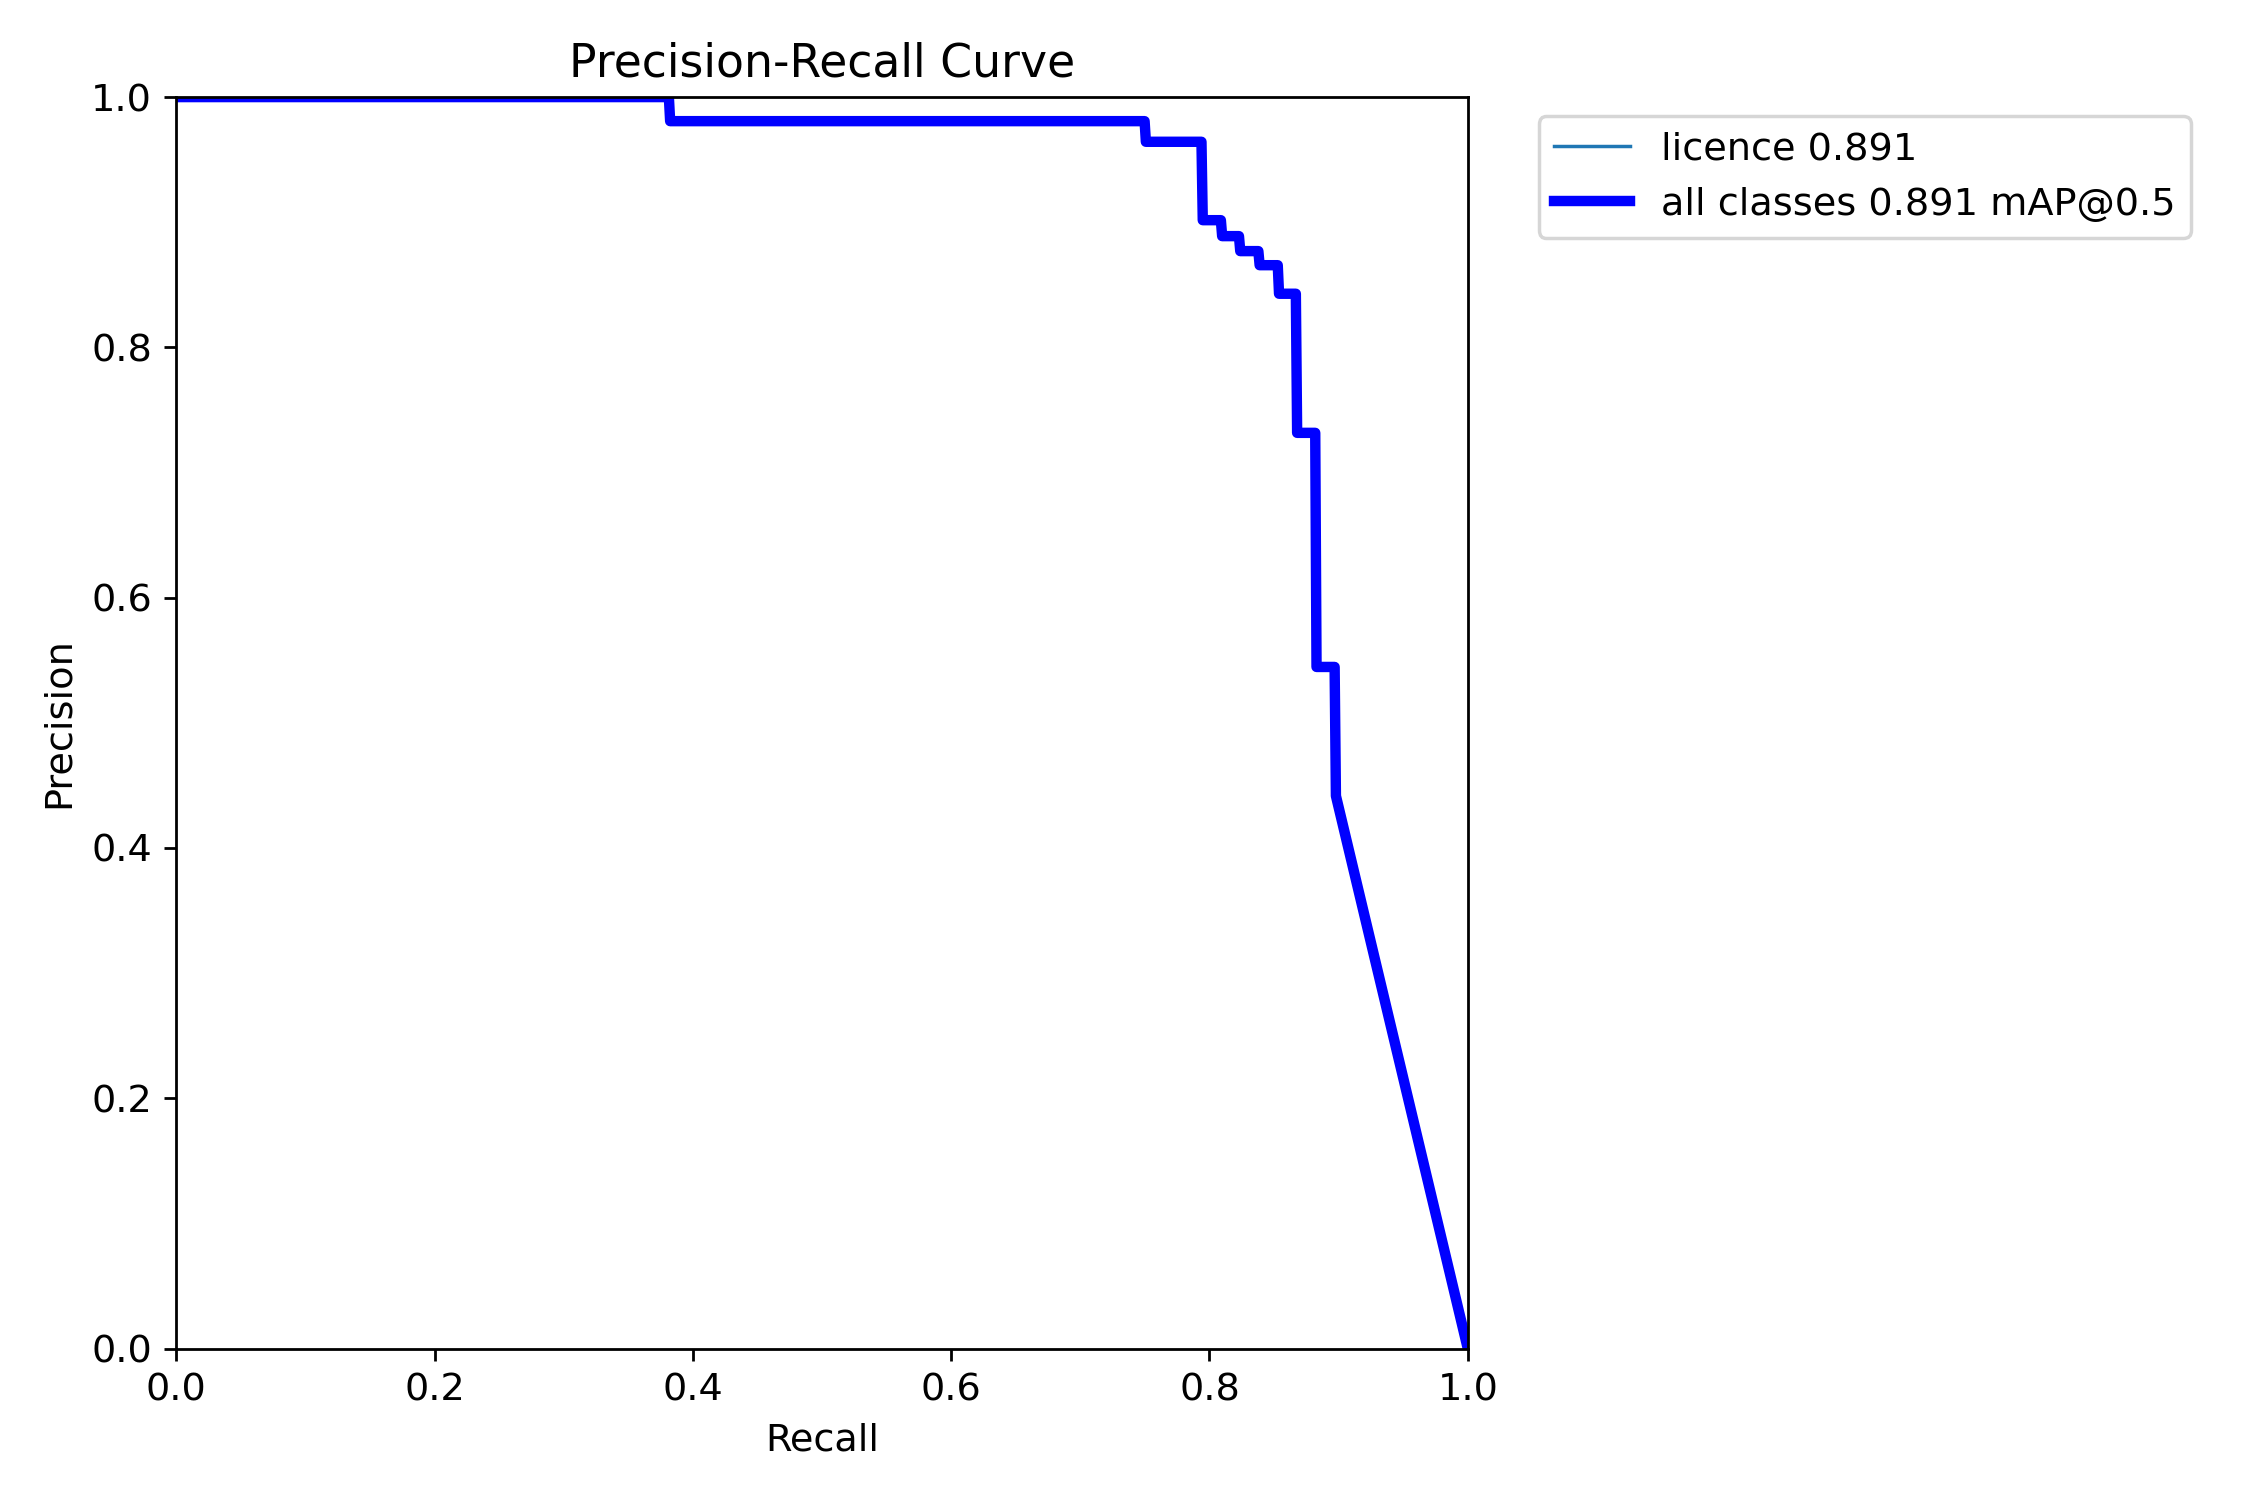

---------------------------------------------------------------------------------------------------- 



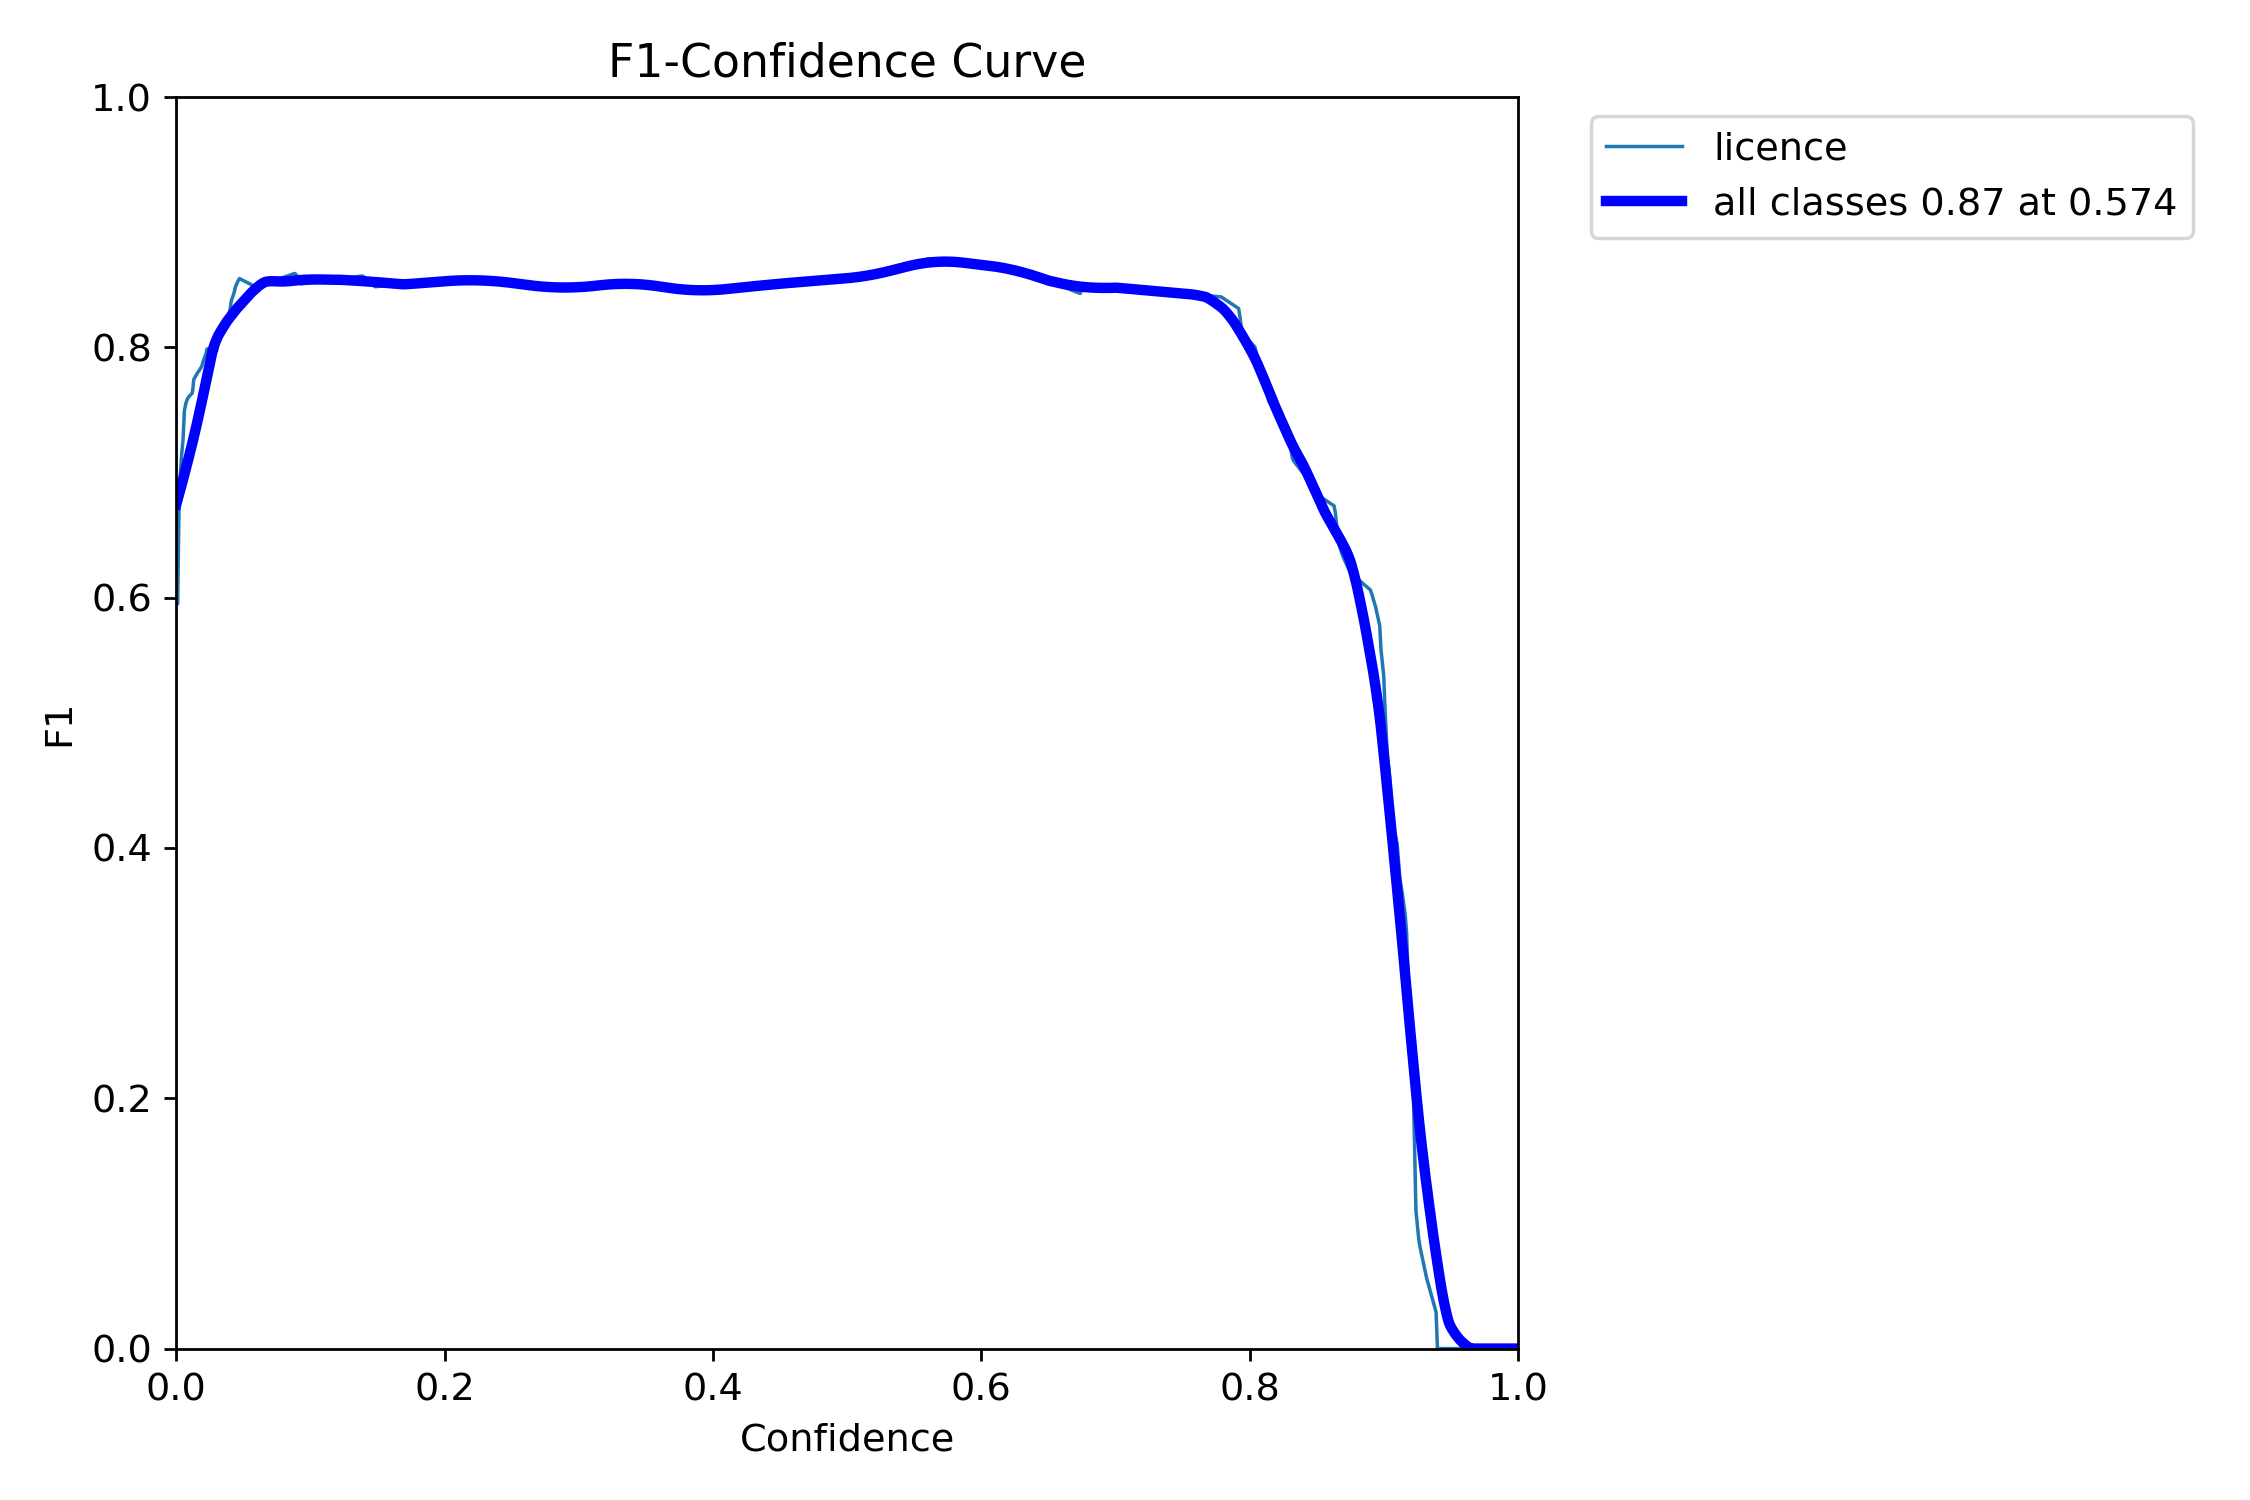

---------------------------------------------------------------------------------------------------- 



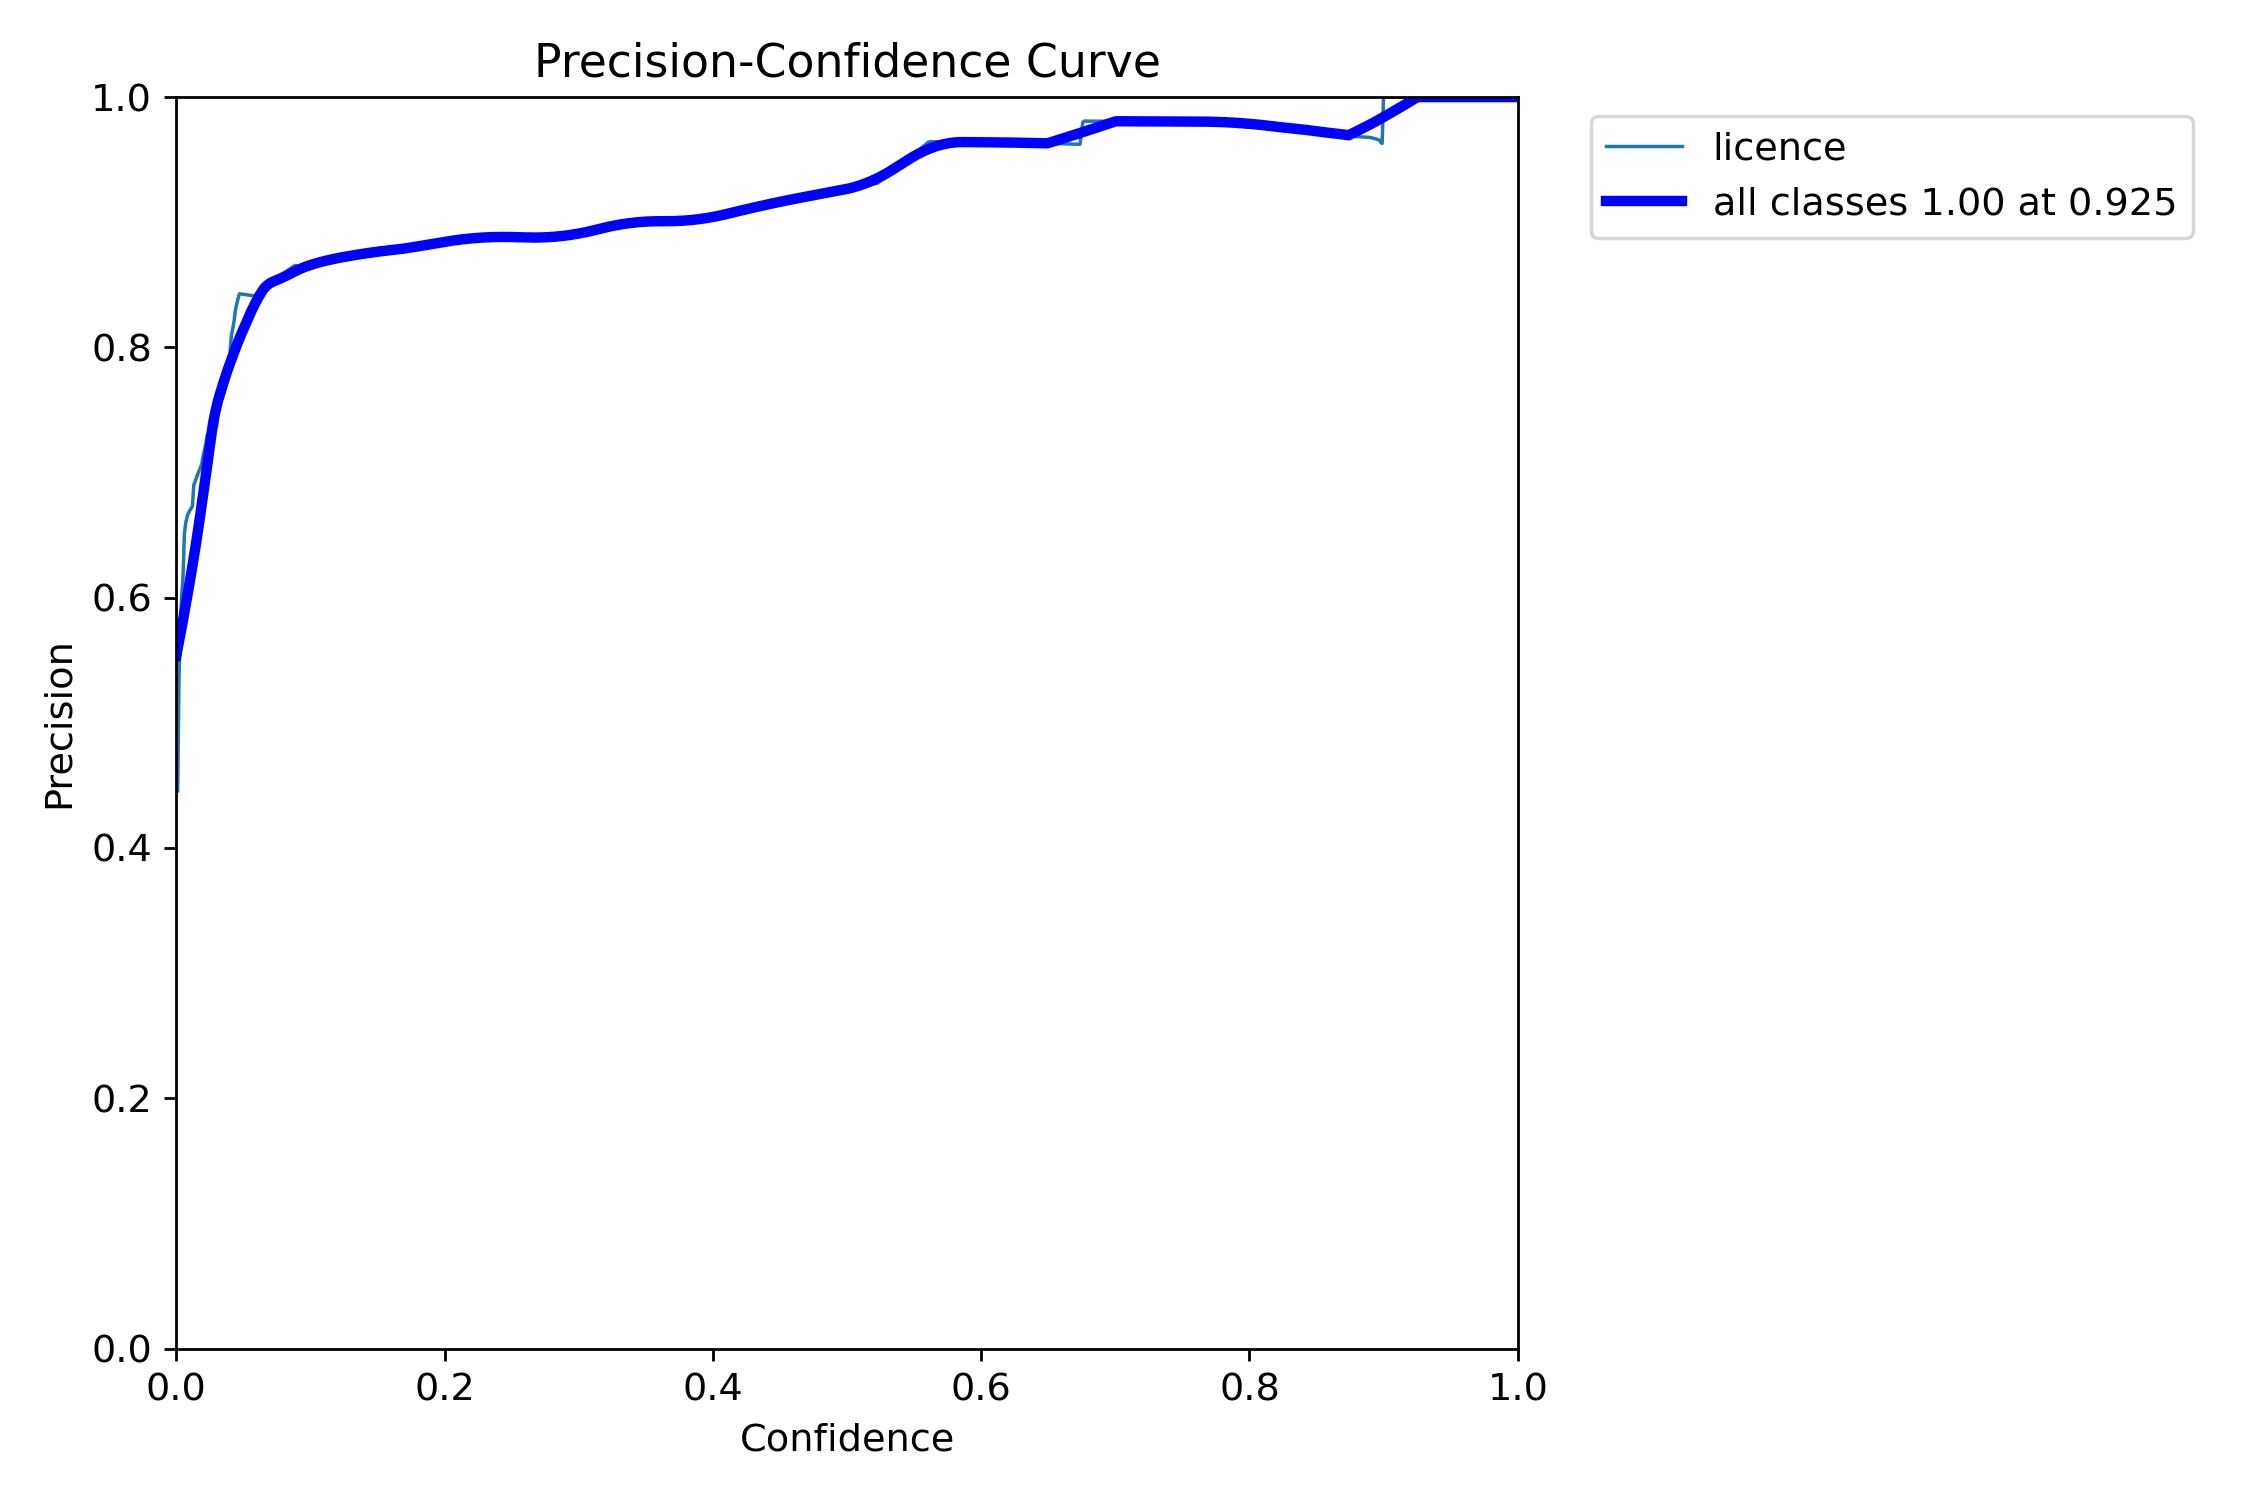

---------------------------------------------------------------------------------------------------- 



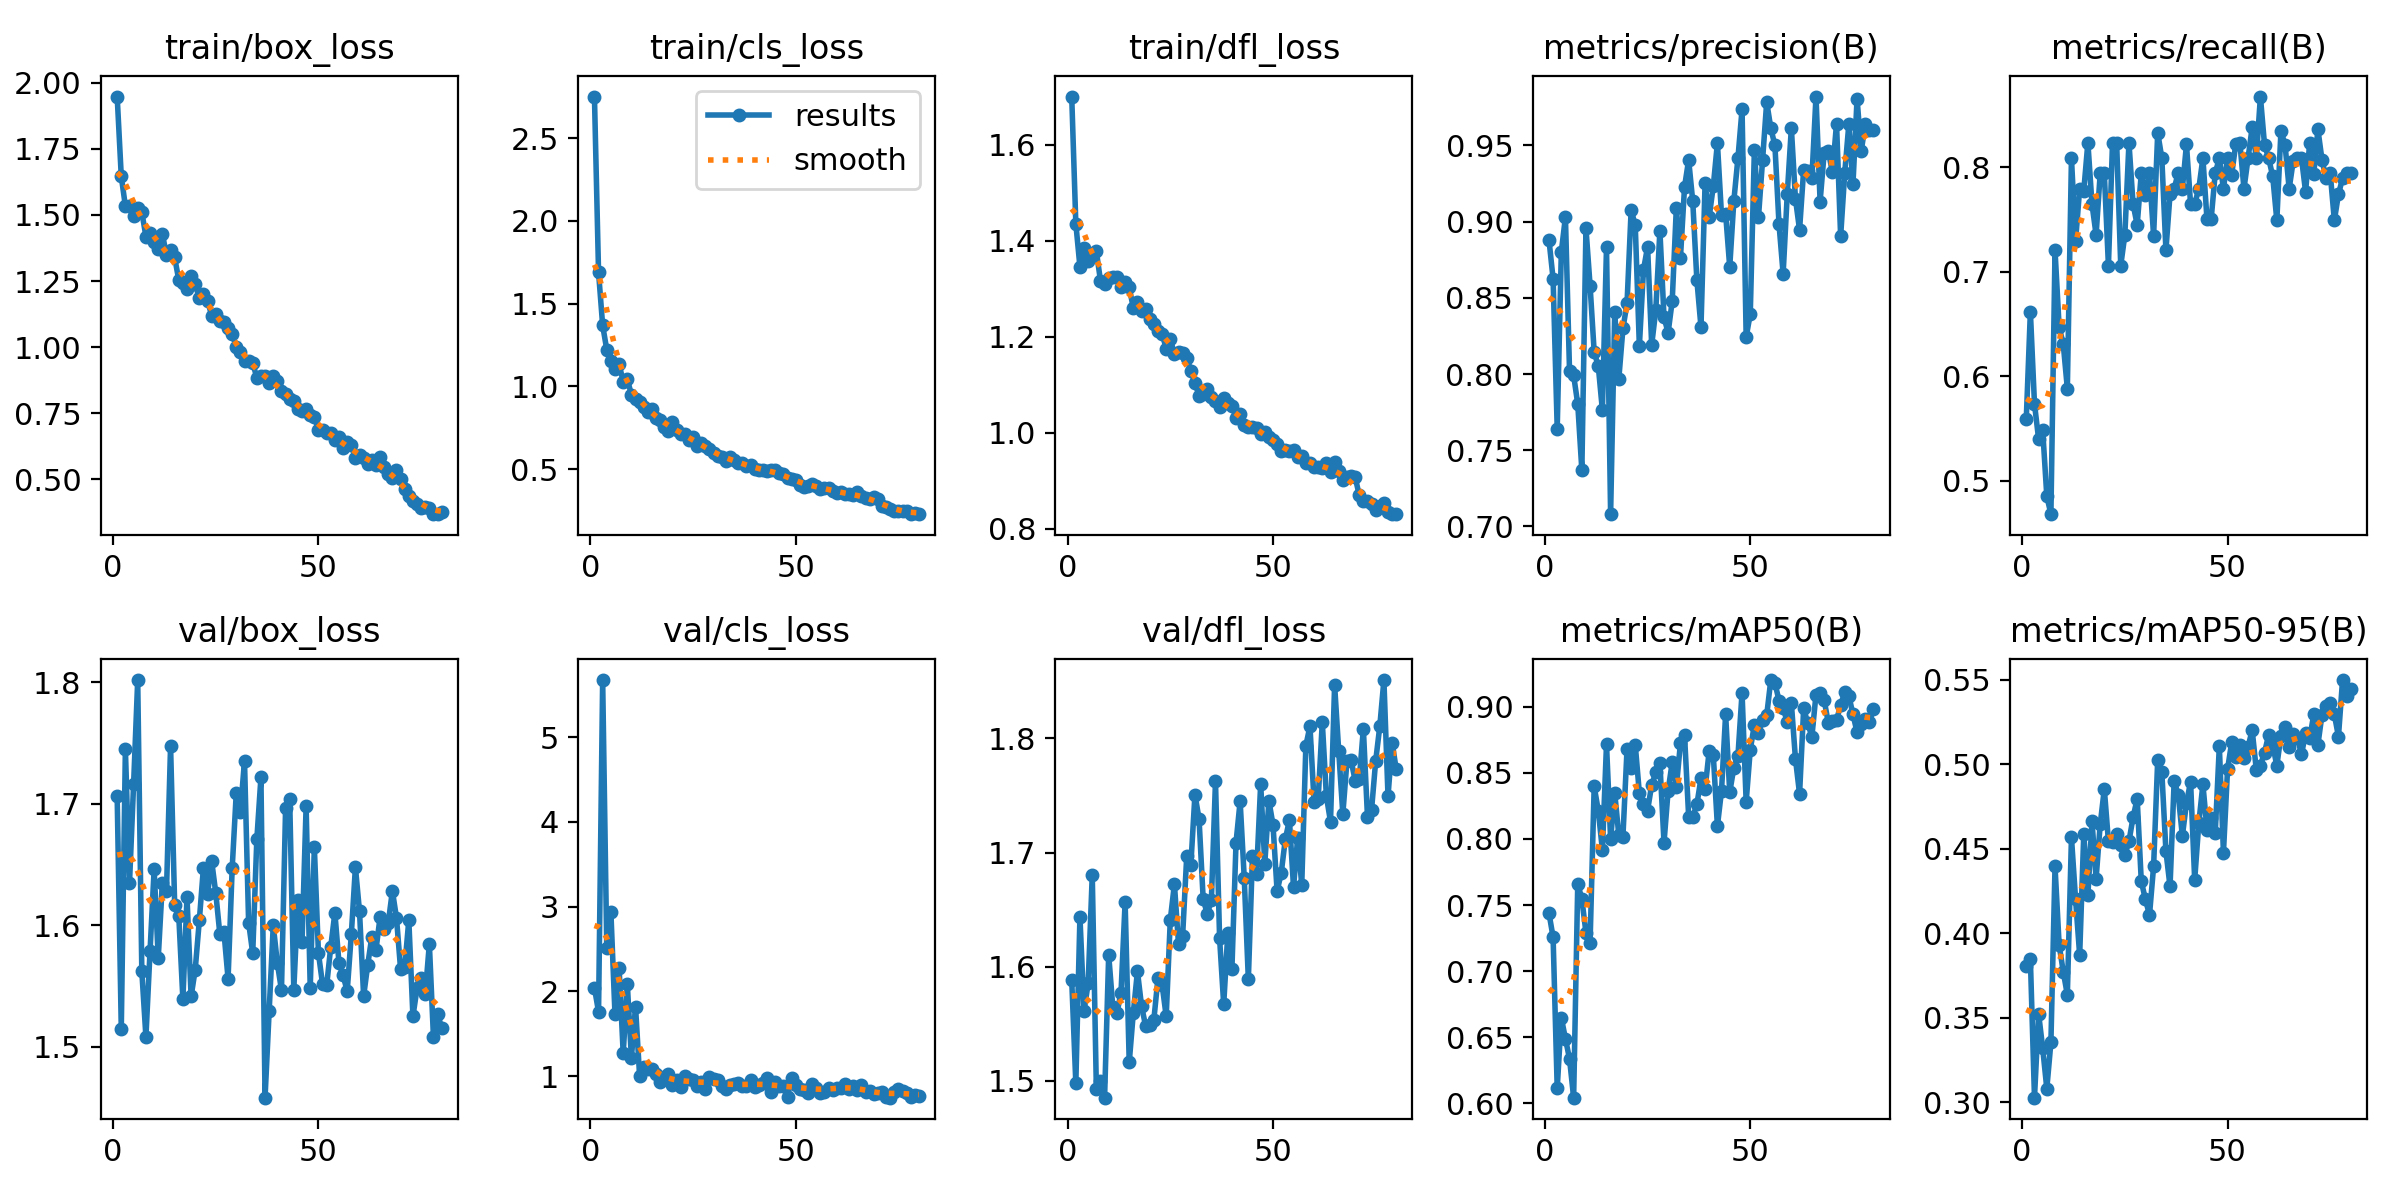

---------------------------------------------------------------------------------------------------- 



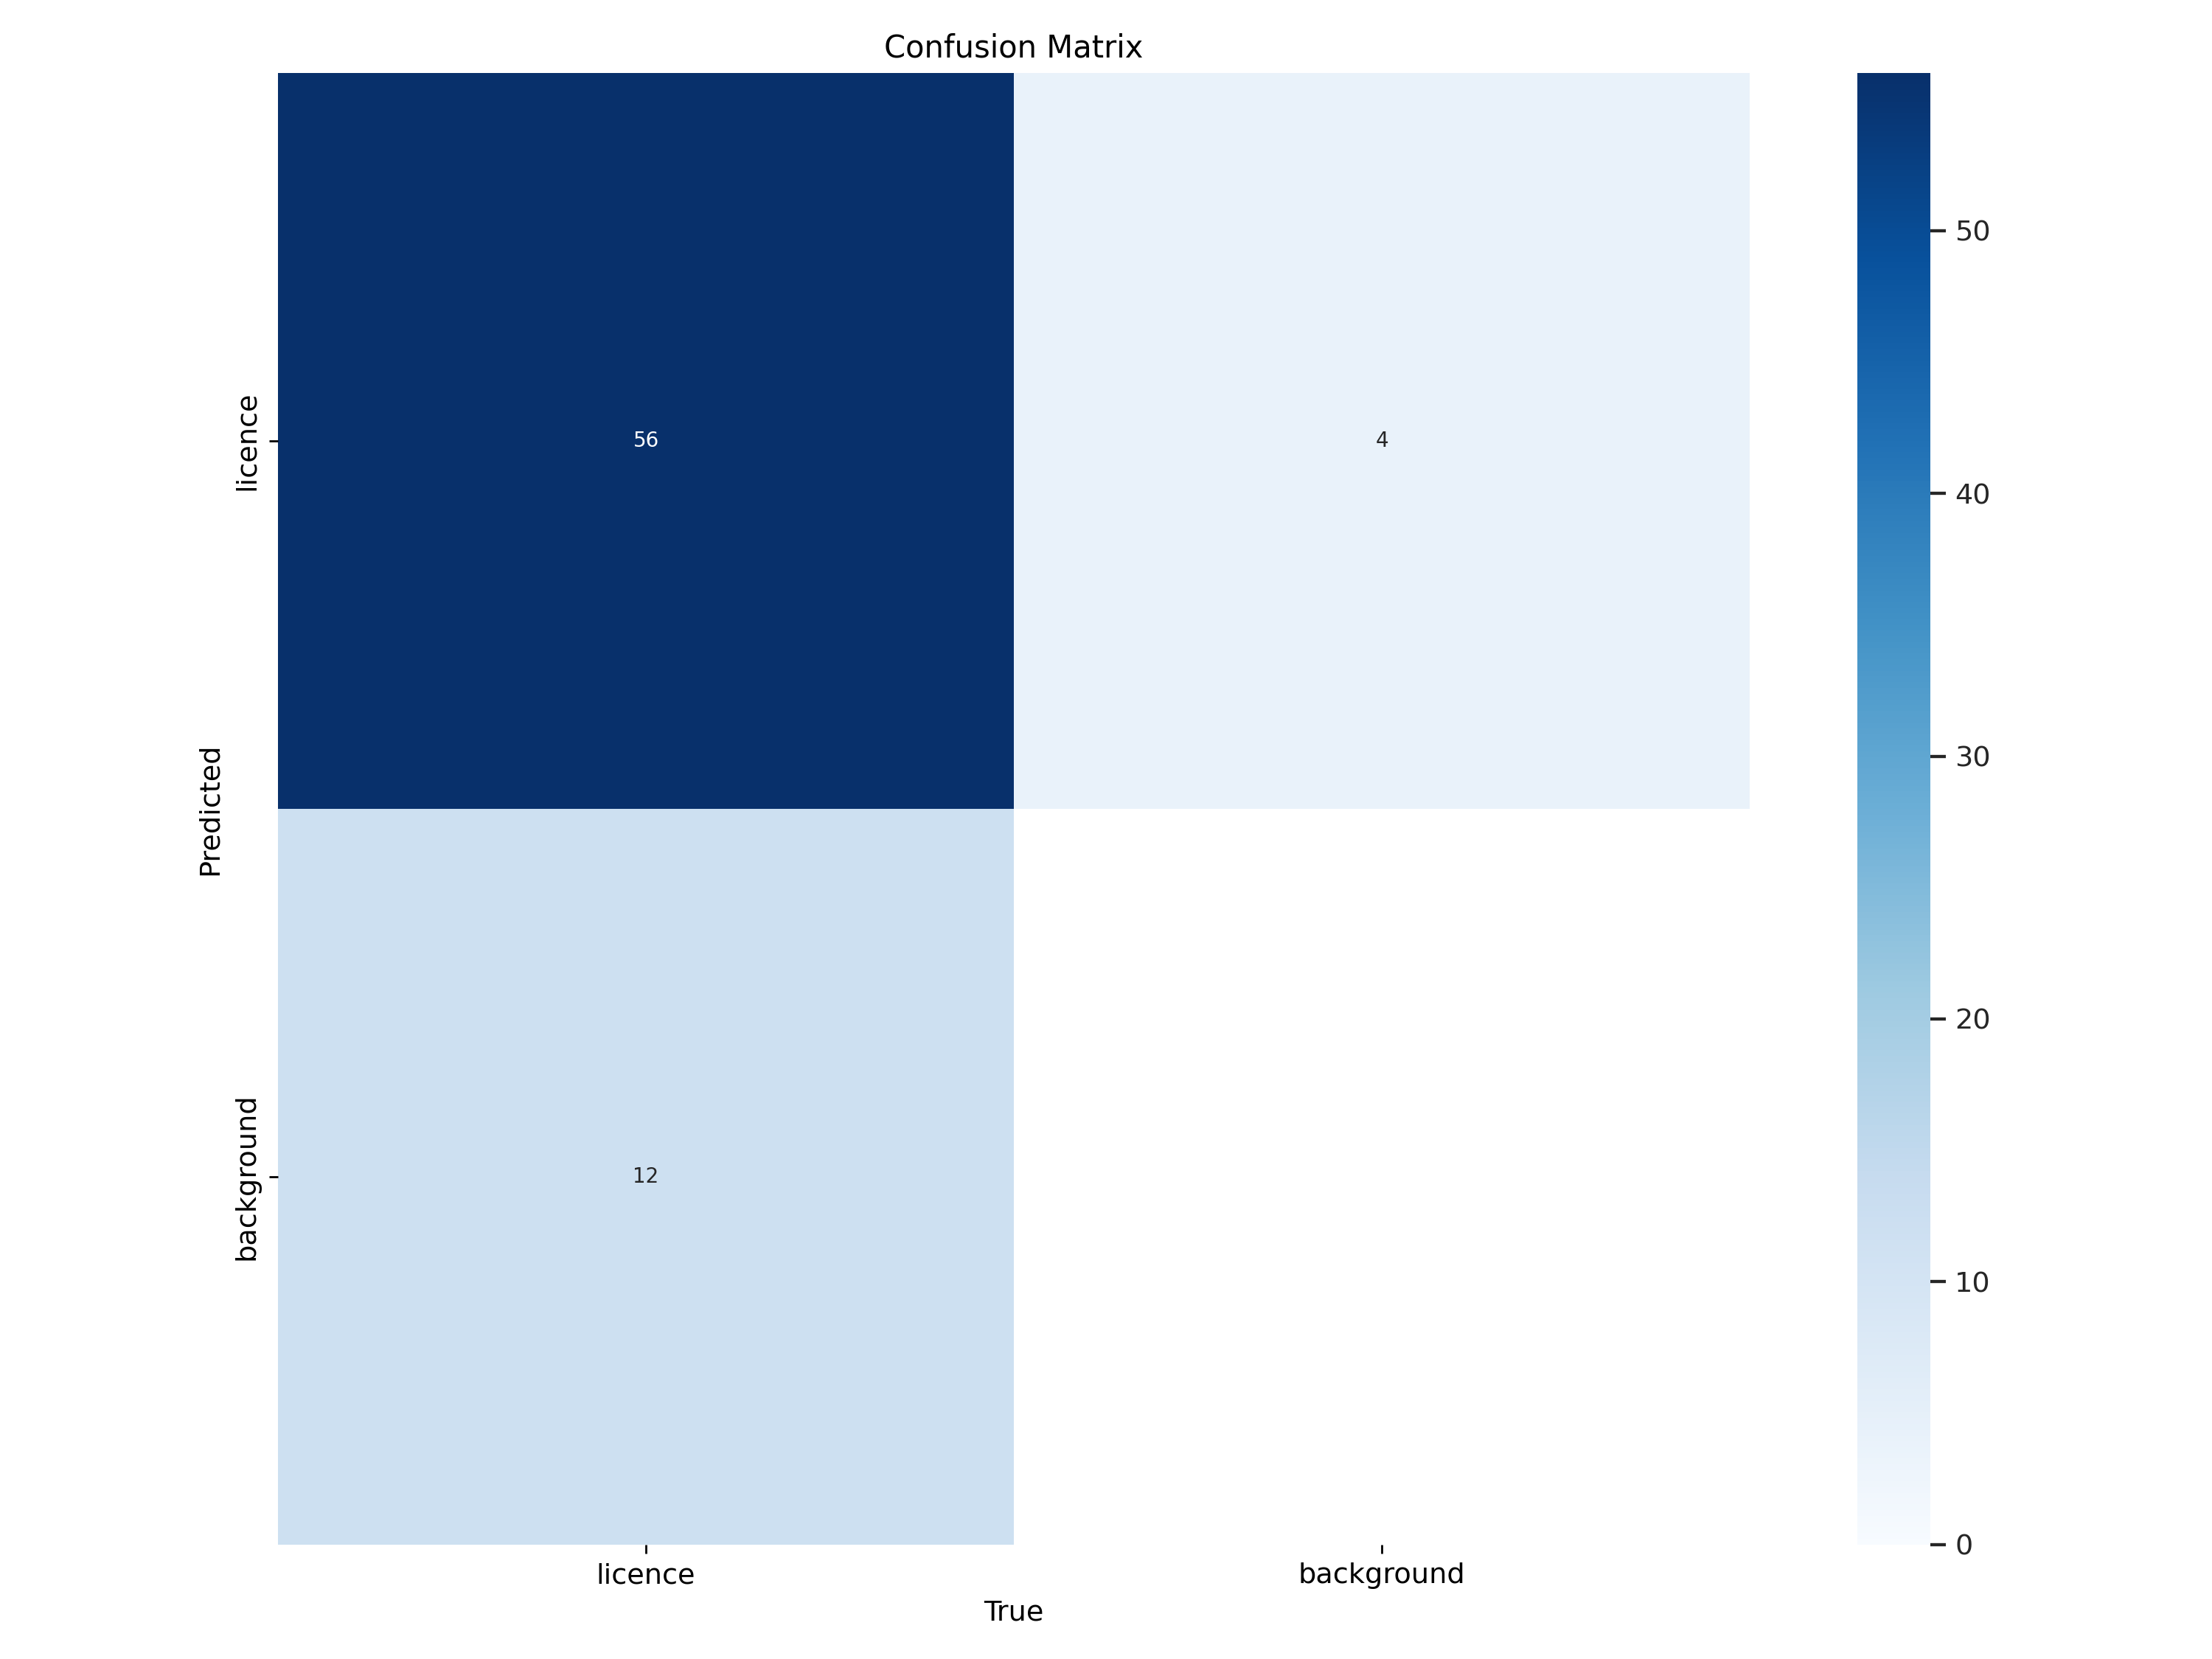

---------------------------------------------------------------------------------------------------- 



In [17]:
for image_path in glob.glob(r'/content/runs/detect/train3/*.png'):
    display(Image(filename=image_path, width=600))
    print("-"*100, "\n")

### Model Metrics

In [18]:
model.val(data=r'/content/Car_License_Plates-1/data.yaml')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/Car_License_Plates-1/valid/labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]
                   all         64         68      0.964      0.789      0.891      0.547
Speed: 9.4ms preprocess, 64.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b75ec424e80>
fitness: 0.5816583317393762
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.54729])
names: {0: 'licence'}
plot: True
results_dict: {'metrics/precision(B)': 0.9640685168257255, 'metrics/recall(B)': 0.7891987634061346, 'metrics/mAP50(B)': 0.8909949072459123, 'metrics/mAP50-95(B)': 0.5472876011275388, 'fitness': 0.5816583317393762}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 9.431689977645874, 'inference': 64.22615051269531, 'loss': 0.002041459083557129, 'postprocess': 2.7983374893665314}

### Select the Best Model

In [19]:
best = YOLO(model= r"/content/runs/detect/train3/weights/best.pt")

### Testing

In [20]:
best.predict(conf=0.25, source=r"/content/Car_License_Plates-1/test/images/Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg", save=True)


image 1/1 /content/Car_License_Plates-1/test/images/Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg: 640x640 1 licence, 98.2ms
Speed: 1.8ms preprocess, 98.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'licence'}
 orig_img: array([[[ 85,  86,  77],
         [ 60,  61,  52],
         [ 38,  39,  30],
         ...,
         [ 61,  62,  58],
         [ 77,  78,  74],
         [ 79,  80,  76]],
 
        [[ 86,  87,  78],
         [ 62,  63,  54],
         [ 42,  43,  34],
         ...,
         [ 81,  82,  78],
         [103, 104, 100],
         [ 93,  94,  90]],
 
        [[ 81,  82,  73],
         [ 61,  62,  53],
         [ 42,  43,  34],
         ...,
         [115, 116, 112],
         [143, 144, 140],
         [116, 117, 113]],
 
        ...,
 
        [[ 80,  85,  76],
         [ 84,  89,  80],
         [ 84,  89,  80],
         ...,
         [ 88, 103,  99],
         [ 94, 109, 105],
         [ 99, 114, 110]],
 
        [[ 73,  78,  69],
         [ 77,  82,  73],
         [ 80,  85,  76],
         ...,
         [ 90, 106,  99],
  

### Show Prediction Image

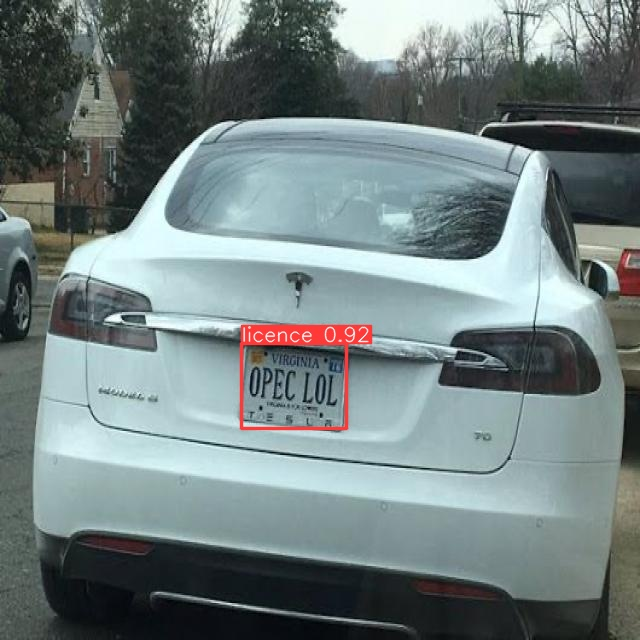

In [22]:
Image(filename=r'/content/runs/detect/predict2/Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg', width=600)

### Compress Run Folder

In [23]:
import shutil

shutil.make_archive("/content/runs", 'zip', "/content/runs")

'/content/runs.zip'

### download Folder

In [24]:
from google.colab import files

files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>